In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ABBAAS HOME

In [66]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/abbaas_home.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()


df_weather = pd.read_csv("weather_data/downtown.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined_1 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_1.dropna(inplace=True)
df_combined_1.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),Daily Rain (in),Weekly Rain (in),Monthly Rain (in),Total Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg),CO2 battery
timestamp,,,,,,,,,,,,,,,,,,,,
2023-03-25 13:00:00,232.0,198.0,439.0,920.8,8.2,13.3,123.6,3001,0.0,1.92,1.92,1.92,37.68,366.6,358.04,410,66,7188.8,346.47,12
2023-03-25 14:00:00,405.0,331.0,809.0,944.0,18.1,26.8,123.6,3088,0.0,1.92,1.92,1.92,37.68,366.6,358.01,407,9,1586.1,346.40,12
2023-03-25 15:00:00,386.0,301.0,726.0,965.6,20.0,26.6,123.6,2900,0.0,1.92,1.92,1.92,37.68,366.6,357.74,454,17,2442.1,346.18,12
2023-03-25 16:00:00,362.0,284.0,728.0,987.5,17.2,27.9,123.6,2962,0.0,1.92,1.92,1.92,37.68,366.6,357.61,446,11,1894.0,346.04,12
2023-03-25 17:00:00,362.0,291.0,657.0,994.1,23.5,32.4,123.6,3160,0.0,1.92,1.92,1.92,37.68,366.6,357.50,419,5,1262.0,345.91,12


In [67]:
df_combined_1["Chan_0_1_pct"] = ((df_combined_1['Chan_0_1'] - df_combined_1['Chan_0_1'].mean())/ 
                df_combined_1['Chan_0_1'].mean()*100)
df_combined_1["Chan_0_2_pct"] = ((df_combined_1['Chan_0_2'] - df_combined_1['Chan_0_2'].mean())/ 
                df_combined_1['Chan_0_2'].mean()*100)
df_combined_1["Chan_1_2_pct"] = ((df_combined_1['Chan_1_2'] - df_combined_1['Chan_1_2'].mean())/ 
                df_combined_1['Chan_1_2'].mean()*100)
df_combined_1["Chan_0_1_m_avg"] = df_combined_1.rolling('12H').Chan_0_1_pct.mean()
df_combined_1["Chan_0_2_m_avg"] = df_combined_1.rolling('12H').Chan_0_2_pct.mean()
df_combined_1["Chan_1_2_m_avg"] = df_combined_1.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_1['Temperature_F_pct'] = ((df_combined_1['Outdoor Temperature (°F)'] - df_combined_1['Outdoor Temperature (°F)'].mean())/ 
                df_combined_1['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_1['Temperature_F_pct'] = df_combined_1['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_1['Relative_Pressure_pct'] = ((df_combined_1['Relative Pressure (inHg)'] - df_combined_1['Relative Pressure (inHg)'].mean())/ 
                df_combined_1['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_1['Relative_Pressure_pct'] = df_combined_1['Relative_Pressure_pct'] * 2

#filter any Relative_Pressure_pct values that are less than -10 and replace them with average
#df_combined['Relative_Pressure_pct'] = df_combined['Relative_Pressure_pct'].mask(df_combined['Relative_Pressure_pct'] < -10, df_combined['Relative_Pressure_pct'].mean())

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_1['Relative_Pressure_pct'] = df_combined_1['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_1['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_1 = df_combined_1.iloc[1:]
df_combined_1 = df_combined_1.iloc[:-1]

df_combined_1.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Absolute Pressure (inHg),CO2 battery,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-25 14:00:00,405.0,331.0,809.0,944.0,18.1,26.8,123.6,3088,0.0,1.92,...,346.40,12,23.028391,29.432997,26.239347,-3.248043,3.429087,-2.628736,1.168090,-0.268218
2023-03-25 15:00:00,386.0,301.0,726.0,965.6,20.0,26.6,123.6,2900,0.0,1.92,...,346.18,12,17.256689,17.701910,13.287721,3.586868,8.186695,2.676749,1.423631,-0.418850
2023-03-25 16:00:00,362.0,284.0,728.0,987.5,17.2,27.9,123.6,2962,0.0,1.92,...,346.04,12,9.966118,11.054294,13.599808,5.181680,8.903595,5.407514,1.682721,-0.491376
2023-03-25 17:00:00,362.0,291.0,657.0,994.1,23.5,32.4,123.6,3160,0.0,1.92,...,345.91,12,9.966118,13.791548,2.520706,6.138568,9.881185,4.830152,1.760803,-0.552745
2023-03-25 18:00:00,315.0,250.0,636.0,971.6,14.3,21.2,123.6,3070,0.0,1.92,...,346.02,12,-4.311251,-2.240938,-0.756212,4.396931,7.860831,3.899092,1.494615,-0.502534


ANDY HOME

In [68]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/andy_home.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()


df_weather = pd.read_csv("weather_data/andy_first_test.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()
#df_weather.head()

#combined both datasets on the timestamp index
df_combined_2 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_2.dropna(inplace=True)
df_combined_2.head()


,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),Daily Rain (in),Weekly Rain (in),Monthly Rain (in),Total Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg),CO2 battery
timestamp,,,,,,,,,,,,,,,,,,,,
2023-03-26 14:00:00,580.0,507.0,1663.0,789.7,16.5,22.2,82.8,2715,0.0,11.76,11.88,11.88,109.2,2256.36,361.08,1141,24,2919.3,347.37,12
2023-03-26 15:00:00,3194.0,2889.0,7886.0,827.8,16.4,22.4,82.8,3080,0.0,11.76,11.88,11.88,109.2,2256.36,360.92,1050,14,2022.9,347.21,12
2023-03-26 16:00:00,3675.0,3300.0,8137.0,846.6,12.9,18.8,82.8,3060,0.0,11.76,11.88,11.88,109.2,2256.36,360.69,1015,11,1533.0,346.97,12
2023-03-26 17:00:00,3360.0,2973.0,7951.0,857.9,3.9,5.5,82.8,2720,0.0,11.76,11.88,11.88,109.2,2256.36,360.42,991,2,917.6,346.71,12
2023-03-26 18:00:00,3486.0,3087.0,8362.0,850.7,2.7,9.9,82.8,1318,0.0,11.76,11.88,11.88,109.2,2256.36,360.45,1016,0,365.5,346.74,12


In [69]:
df_combined_2["Chan_0_1_pct"] = ((df_combined_2['Chan_0_1'] - df_combined_2['Chan_0_1'].mean())/ 
                df_combined_2['Chan_0_1'].mean()*100)
df_combined_2["Chan_0_2_pct"] = ((df_combined_2['Chan_0_2'] - df_combined_2['Chan_0_2'].mean())/ 
                df_combined_2['Chan_0_2'].mean()*100)
df_combined_2["Chan_1_2_pct"] = ((df_combined_2['Chan_1_2'] - df_combined_2['Chan_1_2'].mean())/ 
                df_combined_2['Chan_1_2'].mean()*100)
df_combined_2["Chan_0_1_m_avg"] = df_combined_2.rolling('12H').Chan_0_1_pct.mean()
df_combined_2["Chan_0_2_m_avg"] = df_combined_2.rolling('12H').Chan_0_2_pct.mean()
df_combined_2["Chan_1_2_m_avg"] = df_combined_2.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_2['Temperature_F_pct'] = ((df_combined_2['Outdoor Temperature (°F)'] - df_combined_2['Outdoor Temperature (°F)'].mean())/ 
                df_combined_2['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_2['Temperature_F_pct'] = df_combined_2['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_2['Relative_Pressure_pct'] = ((df_combined_2['Relative Pressure (inHg)'] - df_combined_2['Relative Pressure (inHg)'].mean())/ 
                df_combined_2['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_2['Relative_Pressure_pct'] = df_combined_2['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_2['Relative_Pressure_pct'] = df_combined_2['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_2['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_2 = df_combined_2.iloc[1:]
df_combined_2 = df_combined_2.iloc[:-1]

df_combined_2.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Absolute Pressure (inHg),CO2 battery,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-26 15:00:00,3194.0,2889.0,7886.0,827.8,16.4,22.4,82.8,3080,0.0,11.76,...,347.21,12,-5.542728,-4.693388,5.476619,-44.195093,-43.983861,-36.140234,0.329176,0.191575
2023-03-26 16:00:00,3675.0,3300.0,8137.0,846.6,12.9,18.8,82.8,3060,0.0,11.76,...,346.97,12,8.682052,8.865289,8.833788,-26.569378,-26.367477,-21.148893,0.563759,0.064000
2023-03-26 17:00:00,3360.0,2973.0,7951.0,857.9,3.9,5.5,82.8,2720,0.0,11.76,...,346.71,12,-0.633552,-1.922272,6.346005,-20.085421,-20.256176,-14.275168,0.704759,-0.085761
2023-03-26 18:00:00,3486.0,3087.0,8362.0,850.7,2.7,9.9,82.8,1318,0.0,11.76,...,346.74,12,3.092690,1.838529,11.843202,-15.449799,-15.837235,-9.051494,0.614919,-0.069120
2023-03-26 19:00:00,3590.0,3208.0,7763.0,833.4,0.6,2.2,82.8,924,0.0,11.76,...,346.59,12,6.168318,5.830256,3.831473,-11.846780,-12.225986,-6.904333,0.399052,-0.157868


ALI HOME

In [70]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/Ali.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()


df_weather = pd.read_csv("weather_data/ali_dul_weather.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()

#combined both datasets on the timestamp index
df_combined_3 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_3.dropna(inplace=True)
df_combined_3.head()


,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),Daily Rain (in),Weekly Rain (in),Monthly Rain (in),Total Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg)
timestamp,,,,,,,,,,,,,,,,,,,
2023-03-27 15:00:00,2600.0,87.0,294.0,980.1,21.8,29.3,150.0,3081,0.0,31.08,9.48,31.08,83.88,258.84,358.96,441,54,6181.9,348.86
2023-03-27 16:00:00,6640.0,238.0,673.0,958.1,18.7,26.0,150.0,3061,0.0,31.08,9.48,31.08,83.88,258.84,358.88,422,8,1401.7,348.77
2023-03-27 17:00:00,7315.0,235.0,713.0,949.1,18.9,26.8,150.0,3213,0.0,31.08,9.48,31.08,83.88,258.84,358.75,418,0,751.6,348.60
2023-03-27 18:00:00,6963.0,236.0,678.0,933.4,15.2,23.4,150.0,3338,0.0,31.08,9.48,31.08,83.88,258.84,358.82,427,0,491.0,348.69
2023-03-27 19:00:00,6690.0,262.0,686.0,901.7,6.8,13.2,150.0,3194,0.0,31.08,9.48,31.08,83.88,258.84,359.04,465,0,191.8,348.92


In [71]:
df_combined_3["Chan_0_1_pct"] = ((df_combined_3['Chan_0_1'] - df_combined_3['Chan_0_1'].mean())/ 
                df_combined_3['Chan_0_1'].mean()*100)
df_combined_3["Chan_0_2_pct"] = ((df_combined_3['Chan_0_2'] - df_combined_3['Chan_0_2'].mean())/ 
                df_combined_3['Chan_0_2'].mean()*100)
df_combined_3["Chan_1_2_pct"] = ((df_combined_3['Chan_1_2'] - df_combined_3['Chan_1_2'].mean())/ 
                df_combined_3['Chan_1_2'].mean()*100)
df_combined_3["Chan_0_1_m_avg"] = df_combined_3.rolling('12H').Chan_0_1_pct.mean()
df_combined_3["Chan_0_2_m_avg"] = df_combined_3.rolling('12H').Chan_0_2_pct.mean()
df_combined_3["Chan_1_2_m_avg"] = df_combined_3.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_3['Temperature_F_pct'] = ((df_combined_3['Outdoor Temperature (°F)'] - df_combined_3['Outdoor Temperature (°F)'].mean())/ 
                df_combined_3['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_3['Temperature_F_pct'] = df_combined_3['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_3['Relative_Pressure_pct'] = ((df_combined_3['Relative Pressure (inHg)'] - df_combined_3['Relative Pressure (inHg)'].mean())/ 
                df_combined_3['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_3['Relative_Pressure_pct'] = df_combined_3['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_3['Relative_Pressure_pct'] = df_combined_3['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_3['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_3 = df_combined_3.iloc[1:]
df_combined_3 = df_combined_3.iloc[:-1]

df_combined_3.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Solar Radiation (W/m^2),Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-27 16:00:00,6640.0,238.0,673.0,958.1,18.7,26.0,150.0,3061,0.0,31.08,...,1401.7,348.77,4.386759,-22.877511,-10.233154,-27.369454,-47.342839,-35.509257,1.936323,-0.417317
2023-03-27 17:00:00,7315.0,235.0,713.0,949.1,18.9,26.8,150.0,3213,0.0,31.08,...,751.6,348.60,14.998365,-23.849644,-4.897829,-13.246847,-39.511774,-25.305447,1.824198,-0.489614
2023-03-27 18:00:00,6963.0,236.0,678.0,933.4,15.2,23.4,150.0,3338,0.0,31.08,...,491.0,348.69,9.464609,-23.525599,-9.566238,-7.568983,-35.515230,-21.370645,1.628602,-0.450685
2023-03-27 19:00:00,6690.0,262.0,686.0,901.7,6.8,13.2,150.0,3194,0.0,31.08,...,191.8,348.92,5.172804,-15.100454,-8.499173,-5.020626,-31.432275,-18.796351,1.233673,-0.328337
2023-03-27 20:00:00,7285.0,222.0,658.0,855.0,0.9,1.1,150.0,3290,0.0,31.08,...,1.6,349.17,14.526738,-28.062216,-12.233901,-1.762732,-30.870598,-17.702609,0.651869,-0.205989


DULMINI HOME

In [72]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/Dulmini.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()

df_weather = pd.read_csv("weather_data/ali_dul_weather.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()

#combined both datasets on the timestamp index
df_combined_4 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_4.dropna(inplace=True)
df_combined_4.head()


,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),Daily Rain (in),Weekly Rain (in),Monthly Rain (in),Total Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg)
timestamp,,,,,,,,,,,,,,,,,,,
2023-03-28 16:00:00,4509.0,1198.0,1507.0,879.8,28.9,39.6,121.4,3015,0.0,0.0,0.0,31.08,83.88,258.84,359.18,466,13,1951.2,349.08
2023-03-28 17:00:00,7748.0,1976.0,2372.0,866.6,30.8,49.5,140.1,3401,0.0,0.0,0.0,31.08,83.88,258.84,359.11,465,11,1649.5,349.02
2023-03-28 18:00:00,7509.0,1893.0,2308.0,851.7,29.3,44.4,151.2,2612,0.0,0.0,0.0,31.08,83.88,258.84,359.34,490,0,717.0,349.26
2023-03-28 19:00:00,8203.0,2086.0,2475.0,817.0,29.4,43.2,164.4,3147,0.0,0.0,0.0,31.08,83.88,258.84,359.64,519,0,190.0,349.54
2023-03-28 20:00:00,6988.0,1649.0,2006.0,782.5,53.6,81.1,199.9,3524,0.0,0.0,0.0,31.08,83.88,258.84,359.95,466,0,1.8,349.87


In [73]:
df_combined_4["Chan_0_1_pct"] = ((df_combined_4['Chan_0_1'] - df_combined_4['Chan_0_1'].mean())/ 
                df_combined_4['Chan_0_1'].mean()*100)
df_combined_4["Chan_0_2_pct"] = ((df_combined_4['Chan_0_2'] - df_combined_4['Chan_0_2'].mean())/ 
                df_combined_4['Chan_0_2'].mean()*100)
df_combined_4["Chan_1_2_pct"] = ((df_combined_4['Chan_1_2'] - df_combined_4['Chan_1_2'].mean())/ 
                df_combined_4['Chan_1_2'].mean()*100)
df_combined_4["Chan_0_1_m_avg"] = df_combined_4.rolling('12H').Chan_0_1_pct.mean()
df_combined_4["Chan_0_2_m_avg"] = df_combined_4.rolling('12H').Chan_0_2_pct.mean()
df_combined_4["Chan_1_2_m_avg"] = df_combined_4.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_4['Temperature_F_pct'] = ((df_combined_4['Outdoor Temperature (°F)'] - df_combined_4['Outdoor Temperature (°F)'].mean())/ 
                df_combined_4['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_4['Temperature_F_pct'] = df_combined_4['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_4['Relative_Pressure_pct'] = ((df_combined_4['Relative Pressure (inHg)'] - df_combined_4['Relative Pressure (inHg)'].mean())/ 
                df_combined_4['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_4['Relative_Pressure_pct'] = df_combined_4['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_4['Relative_Pressure_pct'] = df_combined_4['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_4['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_4 = df_combined_4.iloc[1:]
df_combined_4 = df_combined_4.iloc[:-1]

df_combined_4.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Solar Radiation (W/m^2),Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-28 17:00:00,7748.0,1976.0,2372.0,866.6,30.8,49.5,140.1,3401,0.0,0.0,...,1649.5,349.02,14.721281,9.263028,9.395466,-9.257954,-12.246749,-10.551220,2.529495,-1.025926
2023-03-28 18:00:00,7509.0,1893.0,2308.0,851.7,29.3,44.4,151.2,2612,0.0,0.0,...,717.0,349.26,11.182512,4.673538,6.443817,-2.444466,-6.606653,-4.886208,2.314067,-0.898489
2023-03-28 19:00:00,8203.0,2086.0,2475.0,817.0,29.4,43.2,164.4,3147,0.0,0.0,...,190.0,349.54,21.458269,15.345483,14.145775,3.531218,-1.118619,-0.128212,1.812367,-0.732266
2023-03-28 20:00:00,6988.0,1649.0,2006.0,782.5,53.6,81.1,199.9,3524,0.0,0.0,...,1.8,349.87,3.468290,-8.818455,-7.484273,3.518633,-2.658586,-1.599424,1.313558,-0.560503
2023-03-28 21:00:00,7079.0,1678.0,2061.0,740.1,44.7,64.0,219.6,3016,0.0,0.0,...,0.0,350.27,4.815688,-7.214899,-4.947700,3.734808,-3.417972,-2.157470,0.700530,-0.322250


SAMANTHA OFFICE

In [74]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/samantha_data.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()

df_weather = pd.read_csv("weather_data/samantha_weather.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()

#combined both datasets on the timestamp index
df_combined_5 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_5.dropna(inplace=True)
df_combined_5.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Lightning strikes per day,Lightning strikes per hour,Absolute Pressure (inHg),Avg Wind Direction (10 mins) (°),Avg Wind Speed (10 mins) (mph),Last strike time,Distance of last lightning strike (mi),Lightning Detector Battery
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-29 15:00:00,254.0,914.0,494.0,751.2,13.0,22.3,110.4,1517,0,0,...,6,1227.1,0,0,351.56,1269,2.8,20159024616000,48,0
2023-03-29 16:00:00,3155.0,414.0,638.0,752.4,4.9,16.7,110.4,1429,0,0,...,6,1279.5,0,0,351.41,1314,2.2,20159024616000,48,0
2023-03-29 17:00:00,9125.0,326.0,853.0,757.4,4.2,20.1,110.4,1453,0,0,...,0,577.8,0,0,351.33,1145,3.2,20159024616000,48,0
2023-03-29 18:00:00,9329.0,348.0,942.0,754.4,2.6,11.1,110.4,1450,0,0,...,0,220.9,0,0,351.37,1166,0.4,20159024616000,48,0
2023-03-29 19:00:00,9268.0,344.0,934.0,712.9,0.0,2.2,110.4,1261,0,0,...,0,56.2,0,0,351.42,1240,0.0,20159024616000,48,0


In [75]:
df_combined_5["Chan_0_1_pct"] = ((df_combined_5['Chan_0_1'] - df_combined_5['Chan_0_1'].mean())/ 
                df_combined_5['Chan_0_1'].mean()*100)
df_combined_5["Chan_0_2_pct"] = ((df_combined_5['Chan_0_2'] - df_combined_5['Chan_0_2'].mean())/ 
                df_combined_5['Chan_0_2'].mean()*100)
df_combined_5["Chan_1_2_pct"] = ((df_combined_5['Chan_1_2'] - df_combined_5['Chan_1_2'].mean())/ 
                df_combined_5['Chan_1_2'].mean()*100)
df_combined_5["Chan_0_1_m_avg"] = df_combined_5.rolling('12H').Chan_0_1_pct.mean()
df_combined_5["Chan_0_2_m_avg"] = df_combined_5.rolling('12H').Chan_0_2_pct.mean()
df_combined_5["Chan_1_2_m_avg"] = df_combined_5.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_5['Temperature_F_pct'] = ((df_combined_5['Outdoor Temperature (°F)'] - df_combined_5['Outdoor Temperature (°F)'].mean())/ 
                df_combined_5['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_5['Temperature_F_pct'] = df_combined_5['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_5['Relative_Pressure_pct'] = ((df_combined_5['Relative Pressure (inHg)'] - df_combined_5['Relative Pressure (inHg)'].mean())/ 
                df_combined_5['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_5['Relative_Pressure_pct'] = df_combined_5['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_5['Relative_Pressure_pct'] = df_combined_5['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_5['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_5 = df_combined_5.iloc[1:]
df_combined_5 = df_combined_5.iloc[:-1]

df_combined_5.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Distance of last lightning strike (mi),Lightning Detector Battery,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-29 16:00:00,3155.0,414.0,638.0,752.4,4.9,16.7,110.4,1429,0,0,...,48,0,-60.143453,6.568786,-29.410318,-78.467358,70.921918,-37.376552,1.700187,0.952654
2023-03-29 17:00:00,9125.0,326.0,853.0,757.4,4.2,20.1,110.4,1453,0,0,...,48,0,15.274483,-16.083516,-5.622260,-47.220078,41.920107,-26.791788,1.777939,0.906907
2023-03-29 18:00:00,9329.0,348.0,942.0,754.4,2.6,11.1,110.4,1450,0,0,...,48,0,17.851578,-10.420440,4.224890,-30.952164,28.834970,-19.037618,1.731288,0.929780
2023-03-29 19:00:00,9268.0,344.0,934.0,712.9,0.0,2.2,110.4,1261,0,0,...,48,0,17.080976,-11.450091,3.339753,-21.345536,20.777958,-14.562144,1.085942,0.958373
2023-03-29 20:00:00,8647.0,356.0,953.0,643.9,0.0,0.0,110.4,1138,0,0,...,48,0,9.235995,-8.361140,5.441954,-16.248614,15.921442,-11.228128,0.012959,0.952654


LESLIE DATA

In [76]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/leslie_data.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()

df_weather = pd.read_csv("weather_data/leslie_weather.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()

#combined both datasets on the timestamp index
df_combined_6 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_6.dropna(inplace=True)
df_combined_6.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),Daily Rain (in),Weekly Rain (in),Monthly Rain (in),Yearly Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg)
timestamp,,,,,,,,,,,,,,,,,,,
2023-03-30 17:00:00,212.0,118.0,445.0,837.8,2.6,14.4,82.8,2204,0,0,0,18.84,46.44,216.84,350.18,320,0,481.4,350.18
2023-03-30 18:00:00,323.0,258.0,758.0,832.0,4.2,21.2,82.8,1996,0,0,0,18.84,46.44,216.84,350.03,328,0,412.6,350.03
2023-03-30 19:00:00,332.0,236.0,777.0,797.2,0.0,5.5,82.8,2066,0,0,0,18.84,46.44,216.84,350.11,412,0,132.3,350.11
2023-03-30 20:00:00,347.0,260.0,821.0,729.0,0.0,0.0,82.8,1982,0,0,0,18.84,46.44,216.84,350.26,556,0,0.0,350.26
2023-03-30 21:00:00,329.0,256.0,796.0,687.4,0.0,0.0,82.8,1934,0,0,0,18.84,46.44,216.84,350.37,652,0,0.0,350.37


In [77]:
df_combined_6["Chan_0_1_pct"] = ((df_combined_6['Chan_0_1'] - df_combined_6['Chan_0_1'].mean())/ 
                df_combined_6['Chan_0_1'].mean()*100)
df_combined_6["Chan_0_2_pct"] = ((df_combined_6['Chan_0_2'] - df_combined_6['Chan_0_2'].mean())/ 
                df_combined_6['Chan_0_2'].mean()*100)
df_combined_6["Chan_1_2_pct"] = ((df_combined_6['Chan_1_2'] - df_combined_6['Chan_1_2'].mean())/ 
                df_combined_6['Chan_1_2'].mean()*100)
df_combined_6["Chan_0_1_m_avg"] = df_combined_6.rolling('12H').Chan_0_1_pct.mean()
df_combined_6["Chan_0_2_m_avg"] = df_combined_6.rolling('12H').Chan_0_2_pct.mean()
df_combined_6["Chan_1_2_m_avg"] = df_combined_6.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_6['Temperature_F_pct'] = ((df_combined_6['Outdoor Temperature (°F)'] - df_combined_6['Outdoor Temperature (°F)'].mean())/ 
                df_combined_6['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_6['Temperature_F_pct'] = df_combined_6['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_6['Relative_Pressure_pct'] = ((df_combined_6['Relative Pressure (inHg)'] - df_combined_6['Relative Pressure (inHg)'].mean())/ 
                df_combined_6['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_6['Relative_Pressure_pct'] = df_combined_6['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_6['Relative_Pressure_pct'] = df_combined_6['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_6['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_6 = df_combined_6.iloc[1:]
df_combined_6 = df_combined_6.iloc[:-1]

df_combined_6.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Solar Radiation (W/m^2),Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-30 18:00:00,323.0,258.0,758.0,832.0,4.2,21.2,82.8,1996,0,0,...,412.6,350.03,-38.244854,-35.526864,-27.832434,-48.856032,-53.019575,-42.732466,0.965934,0.094513
2023-03-30 19:00:00,332.0,236.0,777.0,797.2,0.0,5.5,82.8,2066,0,0,...,132.3,350.11,-36.524122,-41.024573,-26.023485,-44.745395,-49.021241,-37.162805,0.507262,0.140245
2023-03-30 20:00:00,347.0,260.0,821.0,729.0,0.0,0.0,82.8,1982,0,0,...,0.0,350.26,-33.656236,-35.027072,-21.834338,-41.973106,-45.522699,-33.330689,-0.391628,0.225992
2023-03-30 21:00:00,329.0,256.0,796.0,687.4,0.0,0.0,82.8,1934,0,0,...,0.0,350.37,-37.097699,-36.026656,-24.214535,-40.998024,-43.623490,-31.507458,-0.939925,0.288874
2023-03-30 22:00:00,380.0,278.0,871.0,668.4,0.0,0.0,82.8,1824,0,0,...,0.0,350.65,-27.346887,-30.528946,-17.073945,-38.722835,-41.441066,-29.101872,-1.190349,0.448935


ANDY REDO

In [78]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/andy_new.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()

df_weather = pd.read_csv("weather_data/downtown_andy.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()

#combined both datasets on the timestamp index
df_combined_7 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_7.dropna(inplace=True)
df_combined_7.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),Daily Rain (in),Weekly Rain (in),Monthly Rain (in),Total Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg),CO2 battery
timestamp,,,,,,,,,,,,,,,,,,,,
2023-03-31 22:00:00,2962.0,539.0,864.0,855.2,0.2,1.1,97.2,2923,0.0,0.0,0.0,26.88,64.56,393.48,360.44,765,0,0.0,348.81,12
2023-03-31 23:00:00,458.0,297.0,846.0,845.5,5.0,7.7,97.2,2624,0.0,0.0,0.0,26.88,64.56,393.48,360.27,805,0,0.0,348.64,12
2023-04-01 00:00:00,445.0,293.0,882.0,837.3,4.8,9.9,30.0,2690,0.0,0.0,0.0,26.88,0.00,393.48,360.15,845,0,0.0,348.55,12
2023-04-01 01:00:00,547.0,360.0,965.0,823.4,12.3,20.0,50.7,2718,0.0,0.0,0.0,26.88,0.00,393.48,359.77,875,0,0.0,348.17,12
2023-04-01 02:00:00,503.0,351.0,937.0,812.7,14.3,24.4,72.8,2604,0.0,0.0,0.0,26.88,0.00,393.48,359.39,930,0,0.0,347.80,12


In [79]:
df_combined_7["Chan_0_1_pct"] = ((df_combined_7['Chan_0_1'] - df_combined_7['Chan_0_1'].mean())/ 
                df_combined_7['Chan_0_1'].mean()*100)
df_combined_7["Chan_0_2_pct"] = ((df_combined_7['Chan_0_2'] - df_combined_7['Chan_0_2'].mean())/ 
                df_combined_7['Chan_0_2'].mean()*100)
df_combined_7["Chan_1_2_pct"] = ((df_combined_7['Chan_1_2'] - df_combined_7['Chan_1_2'].mean())/ 
                df_combined_7['Chan_1_2'].mean()*100)
df_combined_7["Chan_0_1_m_avg"] = df_combined_7.rolling('12H').Chan_0_1_pct.mean()
df_combined_7["Chan_0_2_m_avg"] = df_combined_7.rolling('12H').Chan_0_2_pct.mean()
df_combined_7["Chan_1_2_m_avg"] = df_combined_7.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_7['Temperature_F_pct'] = ((df_combined_7['Outdoor Temperature (°F)'] - df_combined_7['Outdoor Temperature (°F)'].mean())/ 
                df_combined_7['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_7['Temperature_F_pct'] = df_combined_7['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_7['Relative_Pressure_pct'] = ((df_combined_7['Relative Pressure (inHg)'] - df_combined_7['Relative Pressure (inHg)'].mean())/ 
                df_combined_7['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_7['Relative_Pressure_pct'] = df_combined_7['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_7['Relative_Pressure_pct'] = df_combined_7['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_7['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_7 = df_combined_7.iloc[1:]
df_combined_7 = df_combined_7.iloc[:-1]

df_combined_7.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Absolute Pressure (inHg),CO2 battery,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-31 23:00:00,458.0,297.0,846.0,845.5,5.0,7.7,97.2,2624,0.0,0.0,...,348.64,12,-14.930704,-6.776660,-5.279476,217.616802,31.203219,-4.271811,0.902067,0.549098
2023-04-01 00:00:00,445.0,293.0,882.0,837.3,4.8,9.9,30.0,2690,0.0,0.0,...,348.55,12,-17.345335,-8.032193,-1.248816,139.296090,18.124748,-3.264146,0.796334,0.482299
2023-04-01 01:00:00,547.0,360.0,965.0,823.4,12.3,20.0,50.7,2718,0.0,0.0,...,348.17,12,1.600229,12.997988,8.044096,104.872125,16.843058,-0.437086,0.617104,0.270767
2023-04-01 02:00:00,503.0,351.0,937.0,812.7,14.3,24.4,72.8,2604,0.0,0.0,...,347.80,12,-6.572367,10.173038,4.909138,82.583226,15.509054,0.632159,0.479136,0.059235
2023-04-01 03:00:00,470.0,302.0,887.0,810.9,18.1,26.8,110.4,2596,0.0,0.0,...,347.60,12,-12.701815,-5.207243,-0.689002,66.702386,12.056338,0.411966,0.455927,-0.052098


STONE MOUNTAIN DATA

In [80]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/stone_mountain_data.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()

df_weather = pd.read_csv("weather_data/Stone_mountain_weather.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()

#combined both datasets on the timestamp index
df_combined_8 = pd.concat([df_morn, df_weather], axis=1, join='outer')
df_combined_8.dropna(inplace=True)
df_combined_8.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Weekly Rain (in),Monthly Rain (in),Yearly Rain (in),Relative Pressure (inHg),Humidity (%),Ultra-Violet Radiation Index,Solar Radiation (W/m^2),Absolute Pressure (inHg),Avg Wind Direction (10 mins) (°),Avg Wind Speed (10 mins) (mph)
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-02 13:00:00,176.0,131.0,208.0,816.2,6.6,23.2,69.6,3294,0.0,0.0,...,0.0,13.92,920.76,348.43,413,71,8015.4,348.43,3639,8.1
2023-04-02 14:00:00,103.0,56.0,266.0,844.8,6.8,24.5,69.6,3450,0.0,0.0,...,0.0,13.92,920.76,348.06,368,60,7122.1,348.06,3635,5.9
2023-04-02 15:00:00,114.0,65.0,415.0,865.7,7.7,20.2,69.6,3601,0.0,0.0,...,0.0,13.92,920.76,347.71,338,59,6690.0,347.71,3653,4.3
2023-04-02 16:00:00,112.0,67.0,437.0,880.2,6.1,29.0,69.6,3565,0.0,0.0,...,0.0,13.92,920.76,347.42,294,46,5226.5,347.42,3606,7.0
2023-04-02 17:00:00,117.0,88.0,663.0,882.1,7.5,23.3,69.6,3418,0.0,0.0,...,0.0,13.92,920.76,347.40,309,32,3681.4,347.40,3592,4.3


In [81]:
df_combined_8["Chan_0_1_pct"] = ((df_combined_8['Chan_0_1'] - df_combined_8['Chan_0_1'].mean())/ 
                df_combined_8['Chan_0_1'].mean()*100)
df_combined_8["Chan_0_2_pct"] = ((df_combined_8['Chan_0_2'] - df_combined_8['Chan_0_2'].mean())/ 
                df_combined_8['Chan_0_2'].mean()*100)
df_combined_8["Chan_1_2_pct"] = ((df_combined_8['Chan_1_2'] - df_combined_8['Chan_1_2'].mean())/ 
                df_combined_8['Chan_1_2'].mean()*100)
df_combined_8["Chan_0_1_m_avg"] = df_combined_8.rolling('12H').Chan_0_1_pct.mean()
df_combined_8["Chan_0_2_m_avg"] = df_combined_8.rolling('12H').Chan_0_2_pct.mean()
df_combined_8["Chan_1_2_m_avg"] = df_combined_8.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_8['Temperature_F_pct'] = ((df_combined_8['Outdoor Temperature (°F)'] - df_combined_8['Outdoor Temperature (°F)'].mean())/ 
                df_combined_8['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_8['Temperature_F_pct'] = df_combined_8['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_8['Relative_Pressure_pct'] = ((df_combined_8['Relative Pressure (inHg)'] - df_combined_8['Relative Pressure (inHg)'].mean())/ 
                df_combined_8['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_8['Relative_Pressure_pct'] = df_combined_8['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_8['Relative_Pressure_pct'] = df_combined_8['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_8['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_8 = df_combined_8.iloc[1:]
df_combined_8 = df_combined_8.iloc[:-1]

df_combined_8.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Avg Wind Direction (10 mins) (°),Avg Wind Speed (10 mins) (mph),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-02 14:00:00,103.0,56.0,266.0,844.8,6.8,24.5,69.6,3450,0.0,0.0,...,3635,5.9,-94.047660,-96.307358,-91.002696,-91.938335,-93.834607,-91.983605,2.215101,0.317216
2023-04-02 15:00:00,114.0,65.0,415.0,865.7,7.7,20.2,69.6,3601,0.0,0.0,...,3653,4.3,-93.411973,-95.713898,-85.962853,-92.429548,-94.461037,-89.976688,2.517298,0.115782
2023-04-02 16:00:00,112.0,67.0,437.0,880.2,6.1,29.0,69.6,3565,0.0,0.0,...,3606,7.0,-93.527552,-95.582018,-85.218715,-92.704049,-94.741282,-88.787194,2.726956,-0.051120
2023-04-02 17:00:00,117.0,88.0,663.0,882.1,7.5,23.3,69.6,3418,0.0,0.0,...,3592,4.3,-93.238604,-94.197277,-77.574389,-92.810960,-94.632481,-86.544633,2.754428,-0.062631
2023-04-02 18:00:00,200.0,115.0,1080.0,831.3,3.3,13.4,69.6,3533,0.0,0.0,...,3713,0.0,-88.442057,-92.416896,-63.469593,-92.082809,-94.263217,-82.698793,2.019903,-0.056875


ME DATA

In [82]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("week_testing/tori_data.csv")
#timestamp column to datetime 
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn = df_morn.resample('H', on ='timestamp', axis=0).sum()


df_weather = pd.read_csv("weather_data/tori_weather.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple Date'])
df_weather = df_weather.resample('H').sum()
df_weather.head()
df_weather.loc['2023-04-04 17:00:00','Event Rain (in)']
# # #combined both datasets on the timestamp index
# # df_combined_9 = pd.concat([df_morn, df_weather], axis=1, join='outer')
# # df_combined_9.dropna(inplace=True)
# # # df_combined_9.head()
for i in df_weather.columns:
    df_morn[i] = df_weather[i] 

df_combined_9 = df_morn
del df_morn
df_combined_9.isna().sum()


Chan_0_1                        0
Chan_0_2                        0
Chan_1_2                        0
Outdoor Temperature (°F)        0
Wind Speed (mph)                0
Wind Gust (mph)                 0
Max Daily Gust (mph)            0
Wind Direction (°)              0
Hourly Rain (in/hr)             0
Event Rain (in)                 0
Daily Rain (in)                 0
Weekly Rain (in)                0
Monthly Rain (in)               0
Total Rain (in)                 0
Relative Pressure (inHg)        0
Humidity (%)                    0
Ultra-Violet Radiation Index    0
Solar Radiation (W/m^2)         0
Absolute Pressure (inHg)        0
CO2 battery                     0
dtype: int64

In [83]:
df_combined_9["Chan_0_1_pct"] = ((df_combined_9['Chan_0_1'] - df_combined_9['Chan_0_1'].mean())/ 
                df_combined_9['Chan_0_1'].mean()*100)
df_combined_9["Chan_0_2_pct"] = ((df_combined_9['Chan_0_2'] - df_combined_9['Chan_0_2'].mean())/ 
                df_combined_9['Chan_0_2'].mean()*100)
df_combined_9["Chan_1_2_pct"] = ((df_combined_9['Chan_1_2'] - df_combined_9['Chan_1_2'].mean())/ 
                df_combined_9['Chan_1_2'].mean()*100)
df_combined_9["Chan_0_1_m_avg"] = df_combined_9.rolling('12H').Chan_0_1_pct.mean()
df_combined_9["Chan_0_2_m_avg"] = df_combined_9.rolling('12H').Chan_0_2_pct.mean()
df_combined_9["Chan_1_2_m_avg"] = df_combined_9.rolling('12H').Chan_1_2_pct.mean()

#scale temperature by the percent change
df_combined_9['Temperature_F_pct'] = ((df_combined_9['Outdoor Temperature (°F)'] - df_combined_9['Outdoor Temperature (°F)'].mean())/ 
                df_combined_9['Outdoor Temperature (°F)'].mean()*100)
#scale by 0.1
df_combined_9['Temperature_F_pct'] = df_combined_9['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined['Relative_Pressure_(inHg)'].sum()
df_combined_9['Relative_Pressure_pct'] = ((df_combined_9['Relative Pressure (inHg)'] - df_combined_9['Relative Pressure (inHg)'].mean())/ 
                df_combined_9['Relative Pressure (inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined_9['Relative_Pressure_pct'] = df_combined_9['Relative_Pressure_pct'] * 2

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined_9['Relative_Pressure_pct'] = df_combined_9['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined_9['Relative_Pressure_pct'].mean())

#remove first and last line of data
df_combined_9 = df_combined_9.iloc[1:]
df_combined_9 = df_combined_9.iloc[:-1]

df_combined_9.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Absolute Pressure (inHg),CO2 battery,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-04 18:00:00,483,357,571,913.8,5.1,8.8,54.0,3086,0,0.0,...,347.99,12,137.229862,127.852949,34.796978,21.561886,16.798570,-29.532578,0.336870,-0.453993
2023-04-04 19:00:00,210,151,489,900.3,0.6,3.3,54.0,3283,0,0.0,...,348.07,12,3.143418,-3.625223,15.439093,15.422397,9.990639,-14.542021,0.184159,-0.376292
2023-04-04 20:00:00,231,170,488,874.5,6.8,10.0,54.0,2710,0,0.0,...,348.25,12,13.457760,8.501404,15.203022,14.931238,9.618330,-7.105760,-0.107690,-0.293042
2023-04-04 21:00:00,265,223,590,855.5,1.7,4.4,54.0,3295,0,0.0,...,348.54,12,30.157171,42.328312,39.282342,17.976424,16.160327,2.171860,-0.322617,-0.104341
2023-04-04 22:00:00,313,243,606,845.4,1.7,5.5,61.2,3135,0,0.0,...,348.74,12,53.732809,55.093184,43.059490,23.935822,22.649136,8.986465,-0.436868,0.001110


COMBINED ALL

In [84]:
#combined all 9 datasets into one df with timestamp as index
df_combined = pd.concat([df_combined_1, df_combined_2, df_combined_3, df_combined_4, df_combined_5, df_combined_6, df_combined_7, df_combined_8, df_combined_9], axis=0, join='inner')
df_combined.dropna(inplace=True)
df_combined.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Solar Radiation (W/m^2),Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-25 14:00:00,405.0,331.0,809.0,944.0,18.1,26.8,123.6,3088,0.0,1.92,...,1586.1,346.40,23.028391,29.432997,26.239347,-3.248043,3.429087,-2.628736,1.168090,-0.268218
2023-03-25 15:00:00,386.0,301.0,726.0,965.6,20.0,26.6,123.6,2900,0.0,1.92,...,2442.1,346.18,17.256689,17.701910,13.287721,3.586868,8.186695,2.676749,1.423631,-0.418850
2023-03-25 16:00:00,362.0,284.0,728.0,987.5,17.2,27.9,123.6,2962,0.0,1.92,...,1894.0,346.04,9.966118,11.054294,13.599808,5.181680,8.903595,5.407514,1.682721,-0.491376
2023-03-25 17:00:00,362.0,291.0,657.0,994.1,23.5,32.4,123.6,3160,0.0,1.92,...,1262.0,345.91,9.966118,13.791548,2.520706,6.138568,9.881185,4.830152,1.760803,-0.552745
2023-03-25 18:00:00,315.0,250.0,636.0,971.6,14.3,21.2,123.6,3070,0.0,1.92,...,374.8,346.02,-4.311251,-2.240938,-0.756212,4.396931,7.860831,3.899092,1.494615,-0.502534


NEW GRAPHS

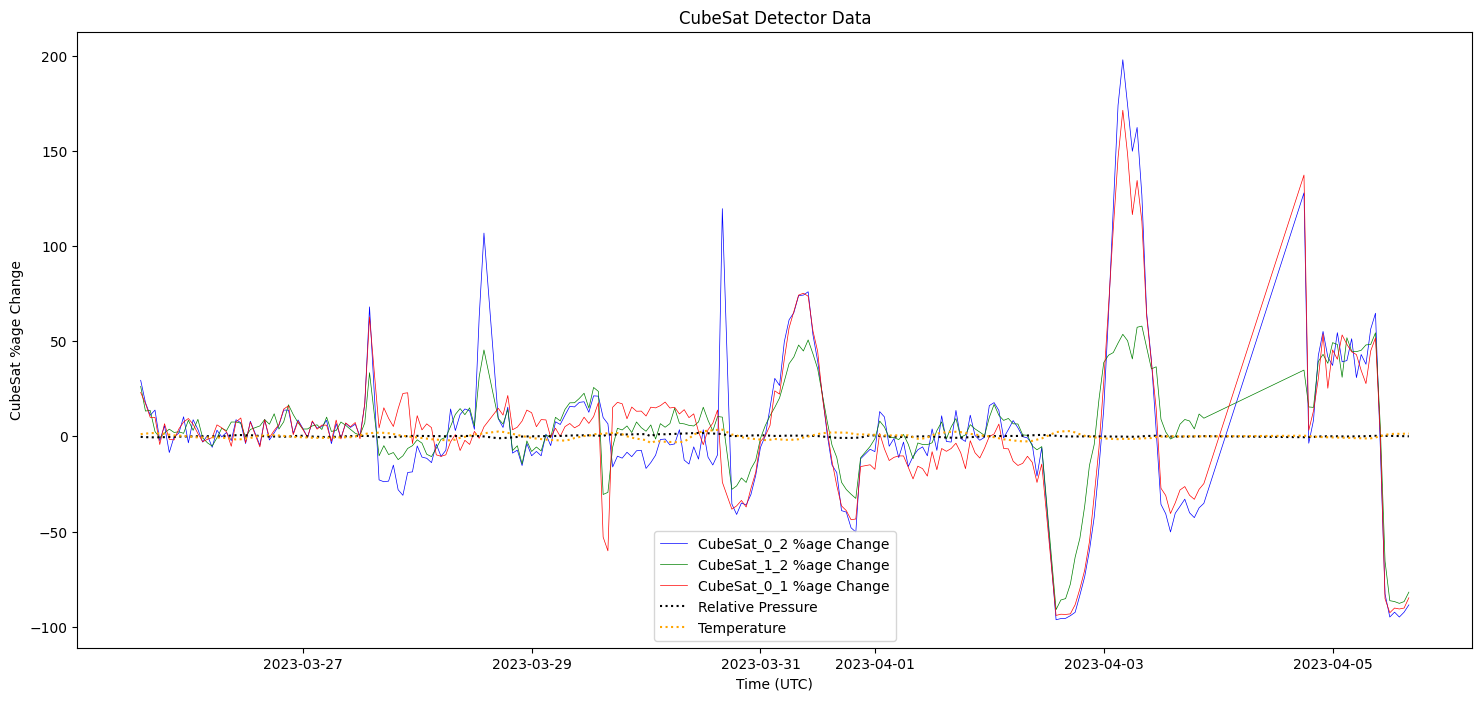

In [85]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

ax6.plot(df_combined["Chan_0_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='blue', label='CubeSat_0_2 %age Change')
#ax6.plot(df_combined["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax6.plot(df_combined["Chan_1_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_combined["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax6.plot(df_combined["Chan_0_1_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_combined["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined.index, df_combined['Relative_Pressure_pct'], color='black',linestyle='dotted', label='Relative Pressure')
ax6.plot(df_combined.index, df_combined['Temperature_F_pct'], color='orange',linestyle='dotted', label='Temperature')

ax6.set_ylabel('CubeSat %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data')
ax6.legend(loc='lower center')

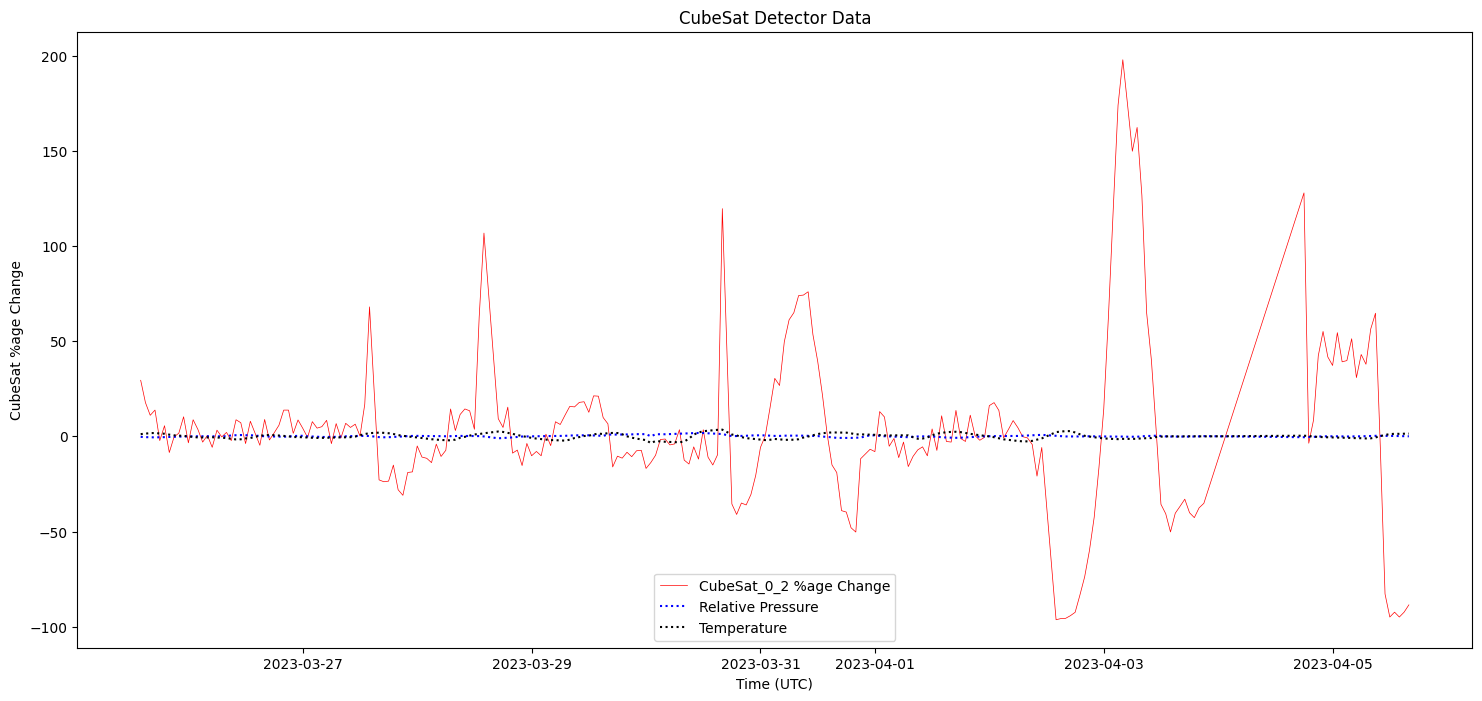

In [86]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

ax6.plot(df_combined["Chan_0_2_pct"], #marker='o', markersize=3, 
         linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_2 %age Change')
#ax6.plot(df_combined["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
#ax6.plot(df_combined["Chan_1_2_pct"], #marker='o', markersize=3,          linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_combined["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
#ax6.plot(df_combined["Chan_0_1_pct"], #marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_combined["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined.index, df_combined['Relative_Pressure_pct'], color='blue',linestyle='dotted', label='Relative Pressure')
ax6.plot(df_combined.index, df_combined['Temperature_F_pct'], color='black',linestyle='dotted', label='Temperature')

ax6.set_ylabel('CubeSat %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data')
ax6.legend(loc='lower center')

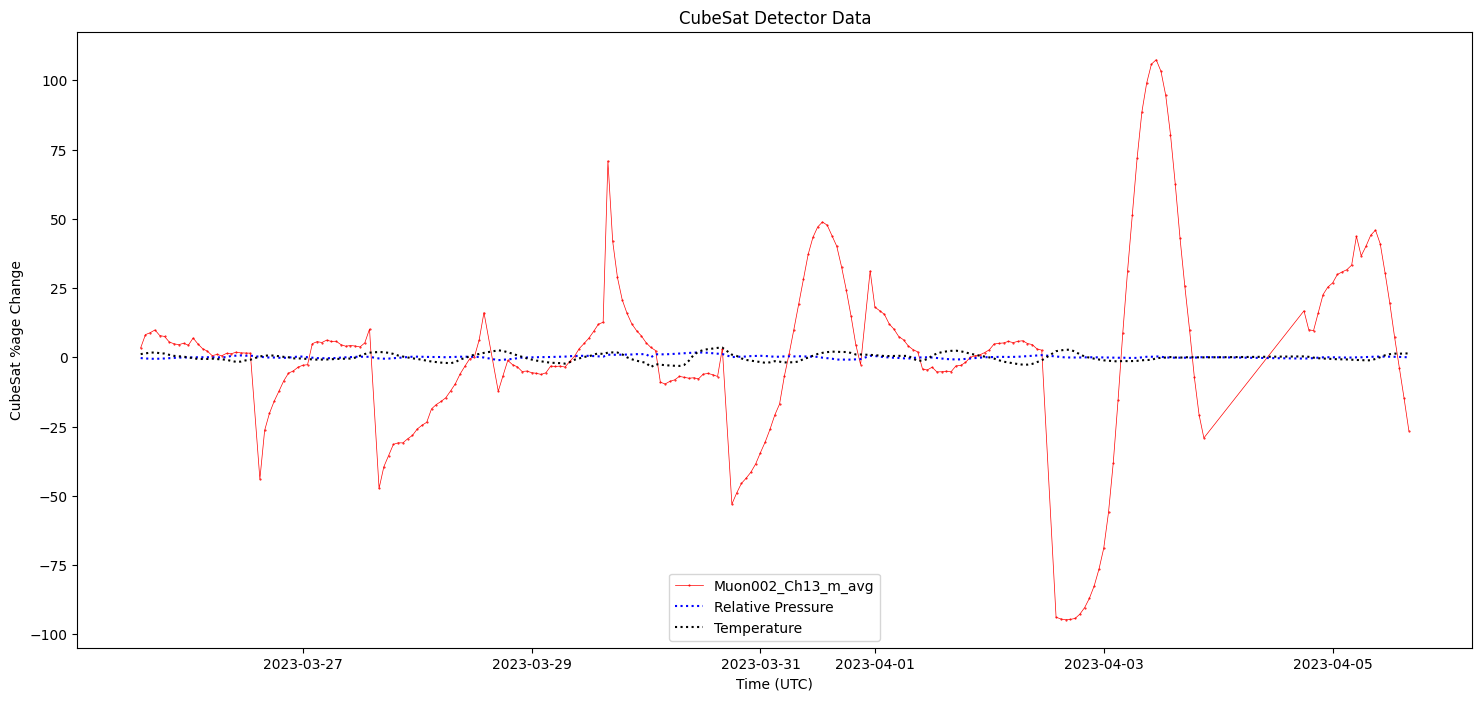

In [103]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

#ax6.plot(df_combined["Chan_0_2_pct"], #marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_2 %age Change')
ax6.plot(df_combined["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch13_m_avg')
#ax6.plot(df_combined["Chan_1_2_pct"], #marker='o', markersize=3,          linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_combined["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
#ax6.plot(df_combined["Chan_0_1_pct"], #marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_combined["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')

#add pressure from the weather data
ax6.plot(df_combined.index, df_combined['Relative_Pressure_pct'], color='blue',linestyle='dotted', label='Relative Pressure')
ax6.plot(df_combined.index, df_combined['Temperature_F_pct'], color='black',linestyle='dotted', label='Temperature')

ax6.set_ylabel('CubeSat %age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Detector Data')
ax6.legend(loc='lower center')

OLD GRAPHS

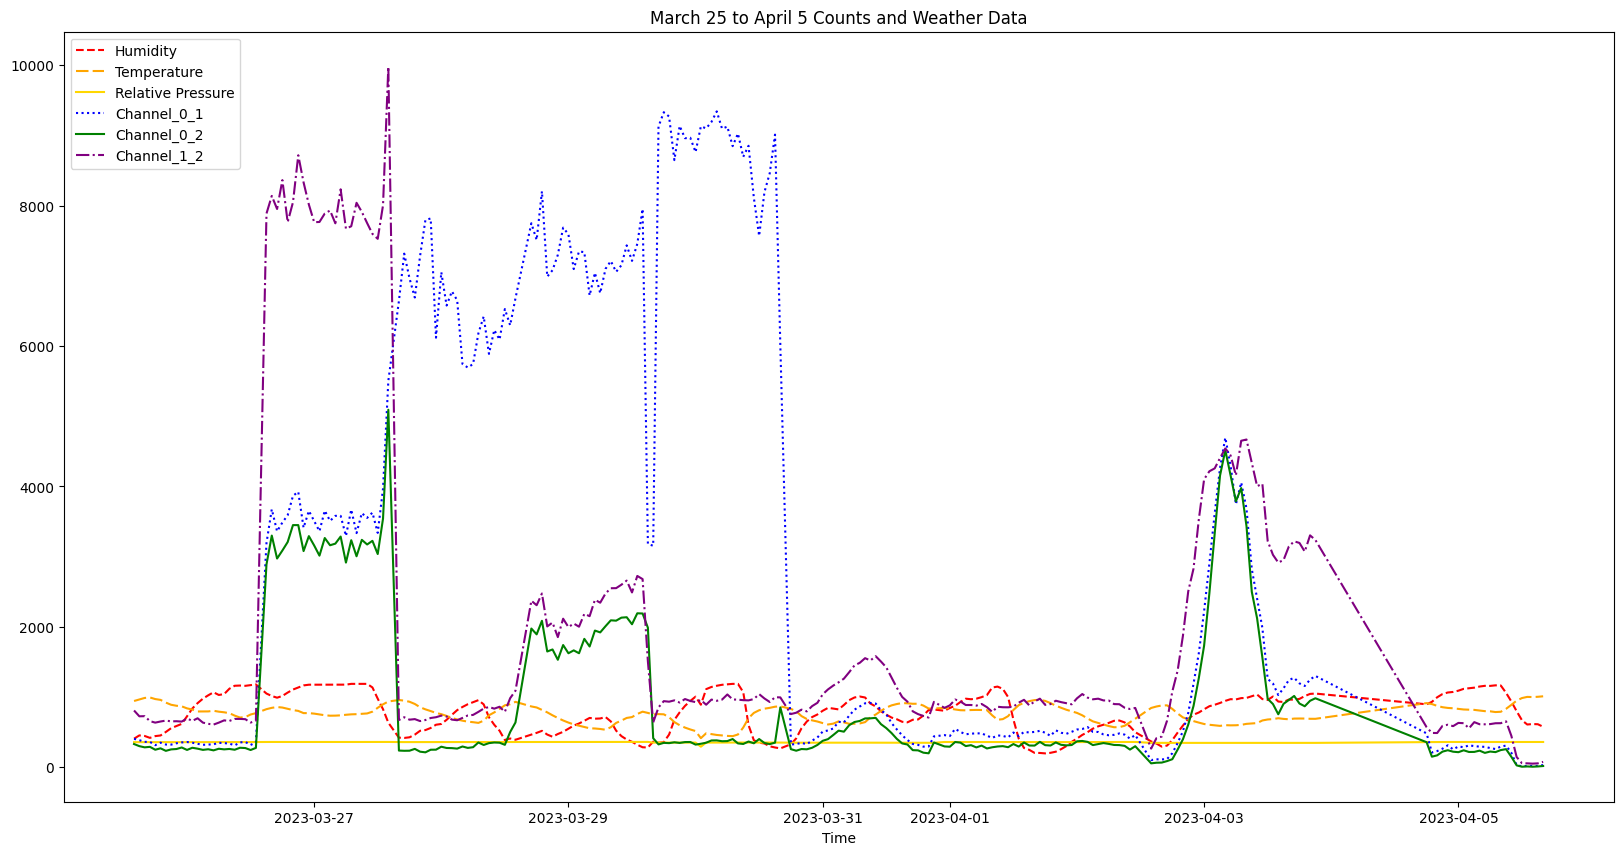

In [87]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='gold')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue',  linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Weather Data')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


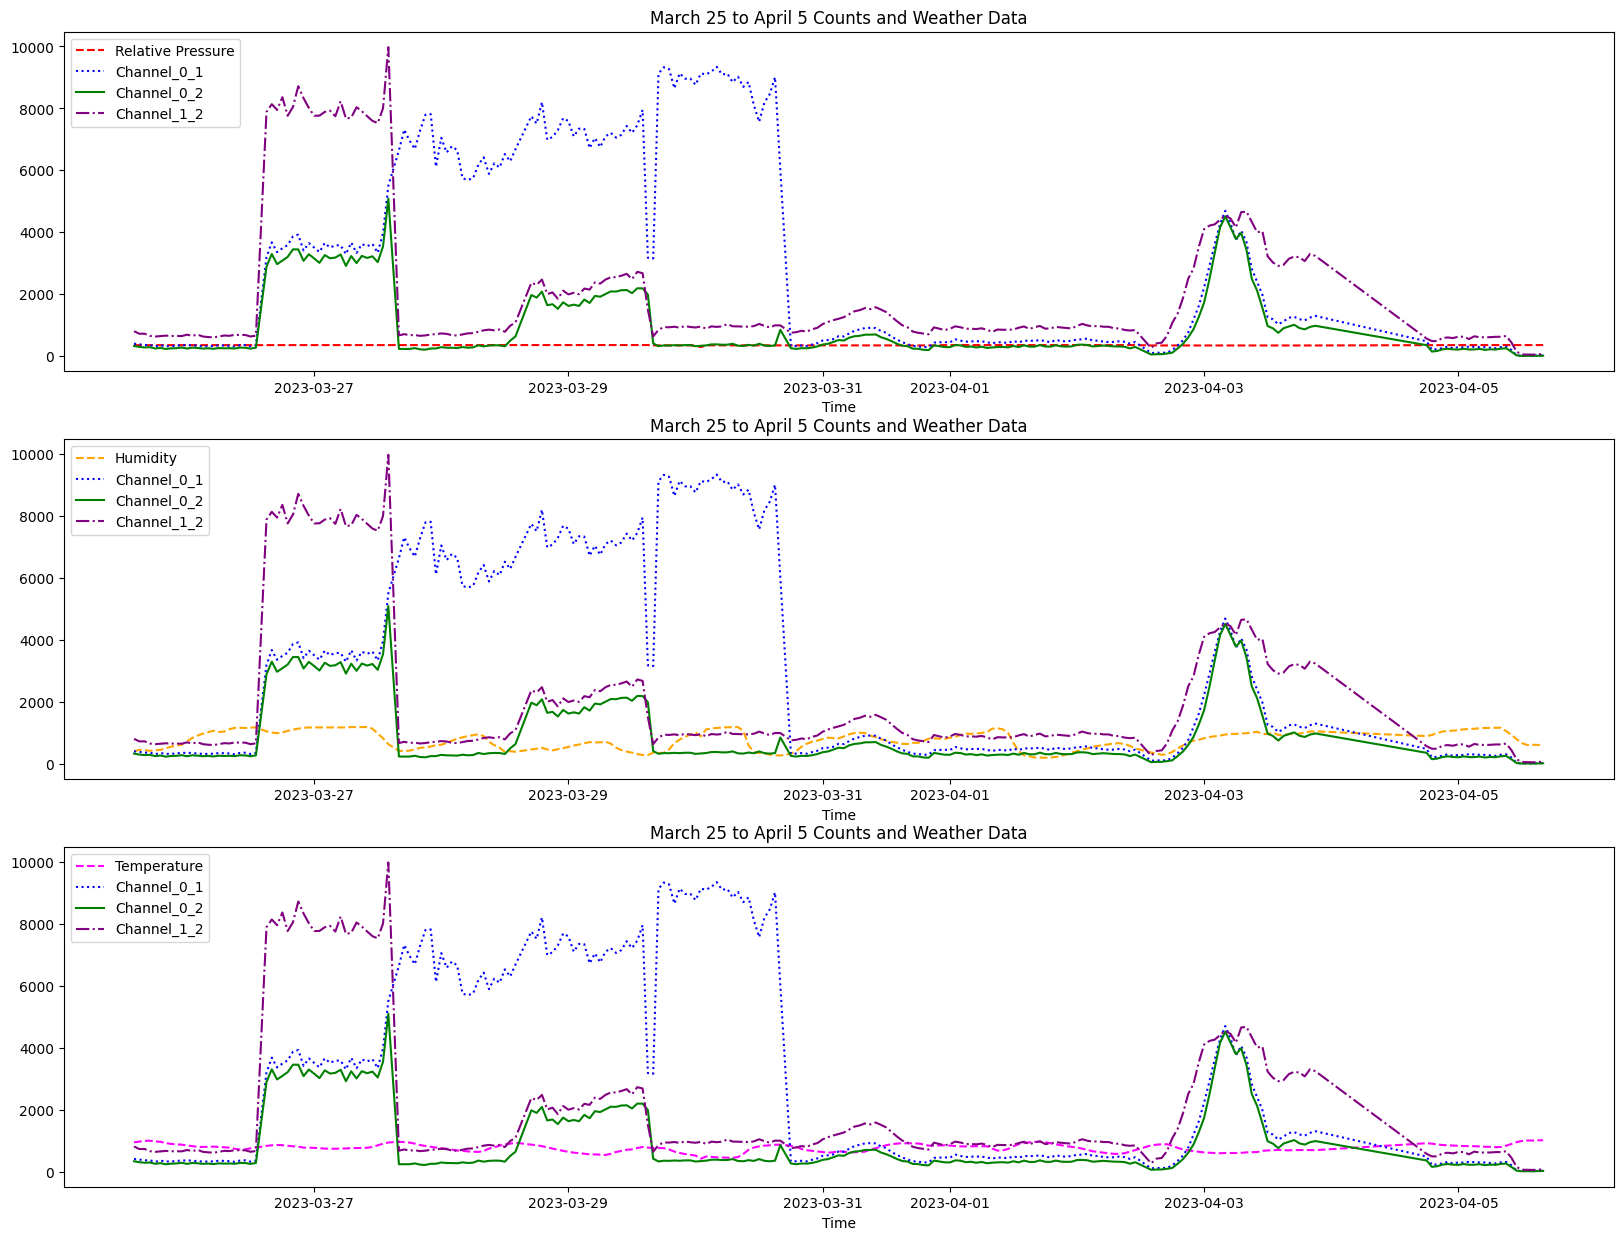

In [88]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))
ax1.set_xlabel('Time')
ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='red', linestyle='dashed')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue',  linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Weather Data')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

#plot average counts on the first axis
ax2.set_xlabel('Time')
#plot humidity on the second axis
ax2.plot(df_combined.index, df_combined['Humidity (%)'], color='orange',linestyle='dashed')

ax2.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax2.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('March 25 to April 5 Counts and Weather Data')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')

ax3.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='magenta', linestyle='dashed')

ax3.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax3.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('March 25 to April 5 Counts and Weather Data')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [89]:
from sklearn.preprocessing import MinMaxScaler
df_copy = df_combined.copy()
#min max scaler
scaler = MinMaxScaler()
#fit the scaler to the data
scaler.fit(df_copy)
#transform the data
scaled_data = scaler.transform(df_copy)
#convert the scaled data to a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=df_copy.columns, index=df_copy.index)
df_scaled.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Solar Radiation (W/m^2),Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-25 14:00:00,0.041819,0.063533,0.076272,0.887938,0.313149,0.324063,0.562842,0.740694,0.0,0.041026,...,0.205328,0.892336,0.441276,0.427554,0.787413,0.288515,0.485512,0.647376,0.669201,0.272079
2023-03-25 15:00:00,0.039781,0.057632,0.067909,0.924174,0.346021,0.321644,0.562842,0.680878,0.0,0.041026,...,0.316142,0.888647,0.419522,0.387665,0.700428,0.310532,0.509041,0.685814,0.705437,0.217990
2023-03-25 16:00:00,0.037208,0.054288,0.068111,0.960913,0.297578,0.337364,0.562842,0.700605,0.0,0.041026,...,0.245188,0.886299,0.392042,0.365061,0.702524,0.315670,0.512587,0.705598,0.742176,0.191947
2023-03-25 17:00:00,0.037208,0.055665,0.060957,0.971985,0.406574,0.391778,0.562842,0.763602,0.0,0.041026,...,0.163372,0.884119,0.392042,0.374368,0.628115,0.318752,0.517422,0.701415,0.753248,0.169911
2023-03-25 18:00:00,0.032168,0.047600,0.058841,0.934239,0.247405,0.256348,0.562842,0.734967,0.0,0.041026,...,0.048520,0.885963,0.338229,0.319853,0.606107,0.313142,0.507430,0.694670,0.715502,0.187940


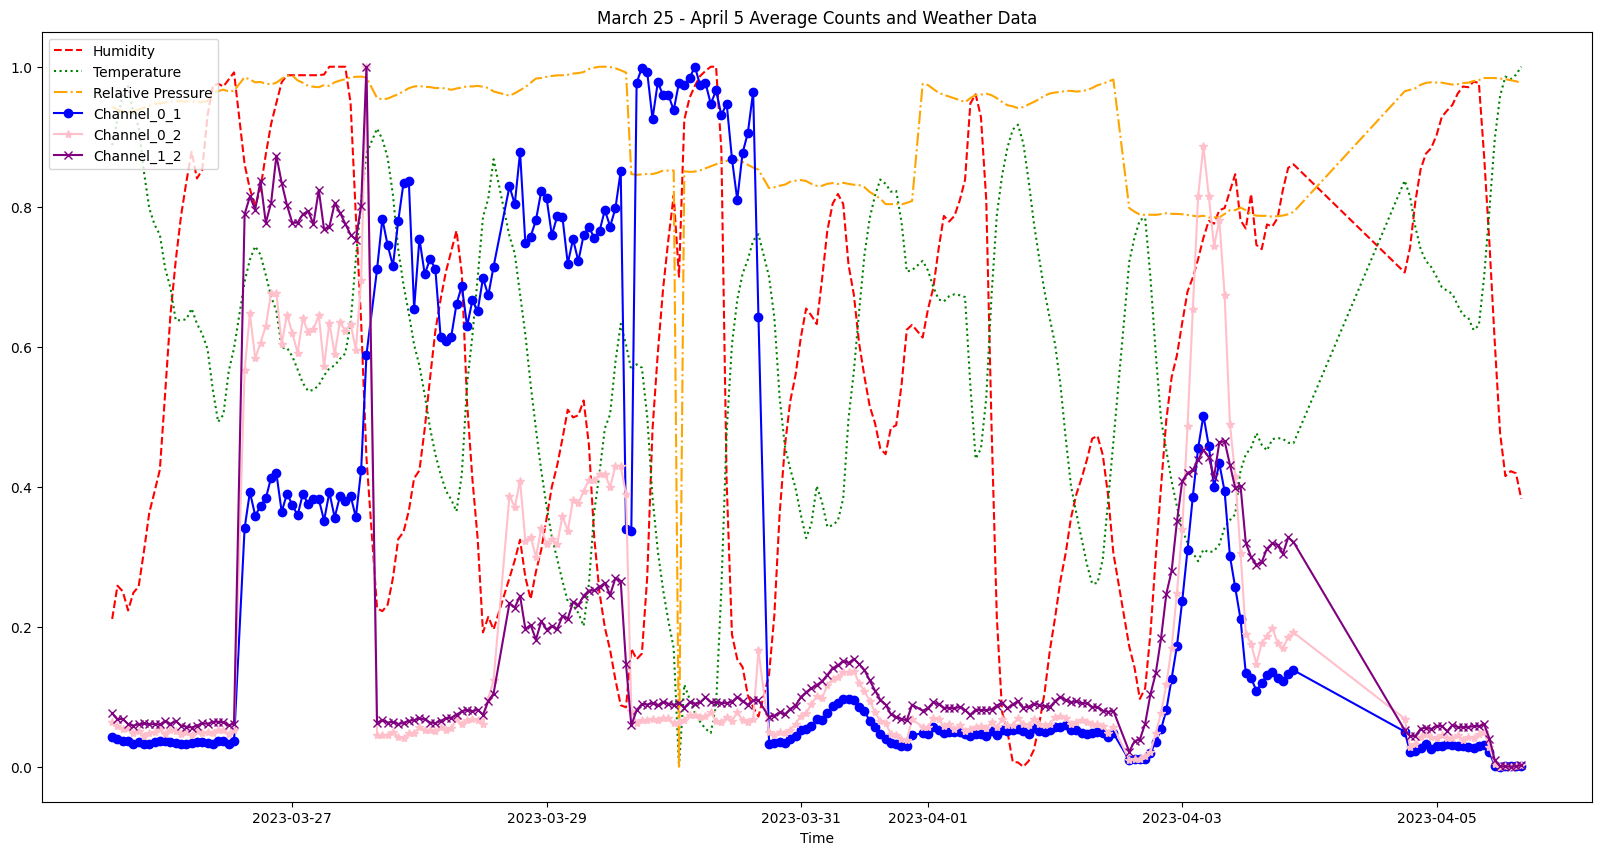

In [90]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_scaled.index, df_scaled['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_scaled.index, df_scaled['Humidity (%)'], color='red', linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_scaled.index, df_scaled['Outdoor Temperature (°F)'], color='green', linestyle='dotted')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative Pressure (inHg)'], color='orange', linestyle='dashdot')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', marker='o')
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink', marker='*')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple', marker='x')

#set the title
ax1.set_title('March 25 - April 5 Average Counts and Weather Data')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

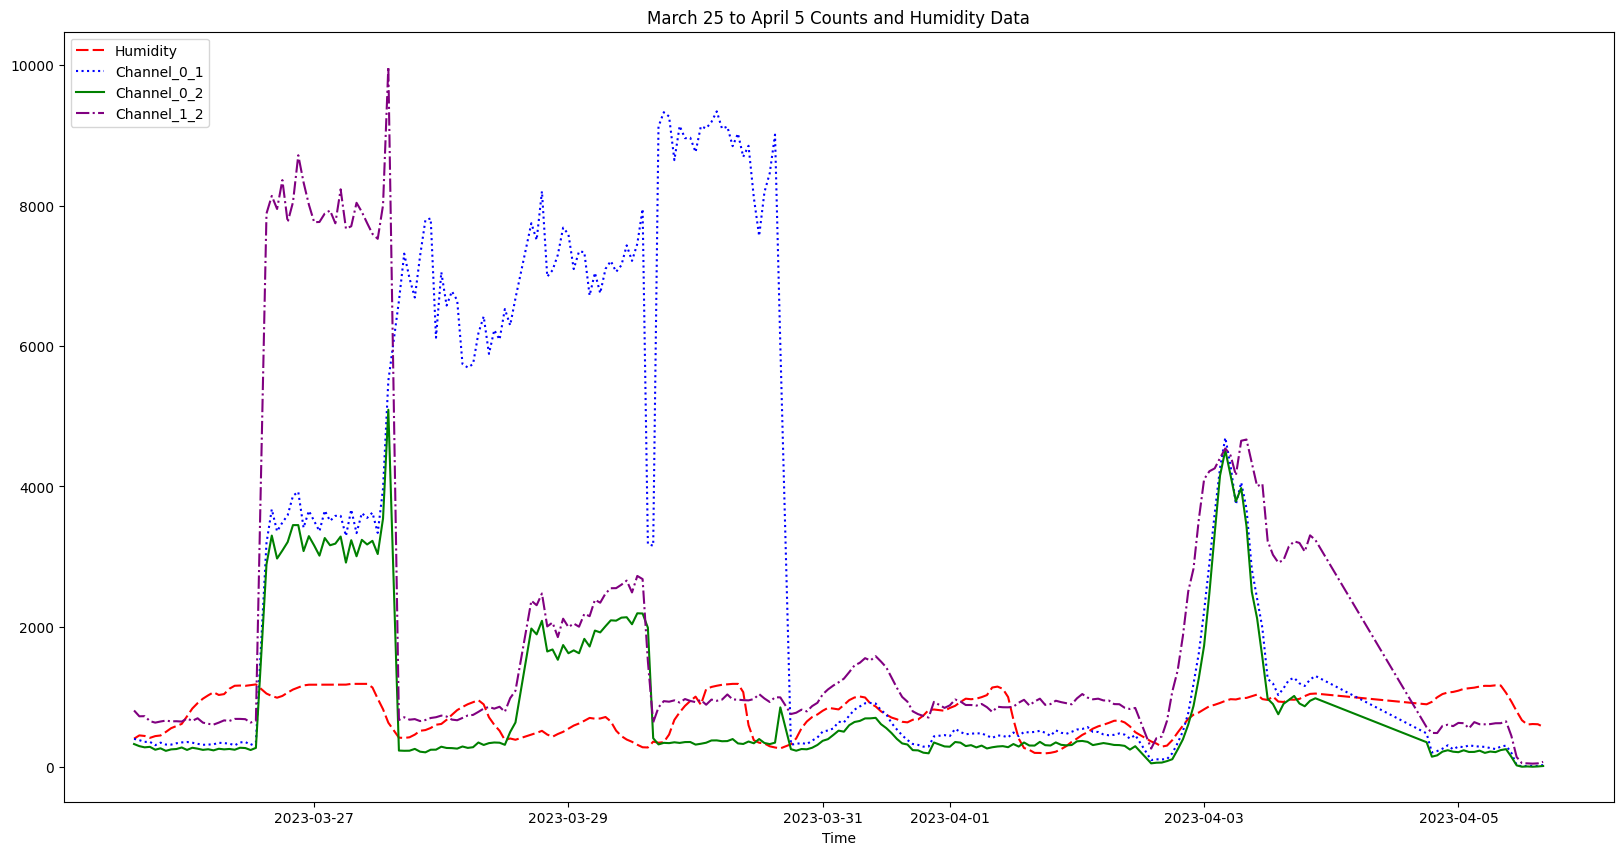

In [91]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='green')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='orange')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Humidity Data')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


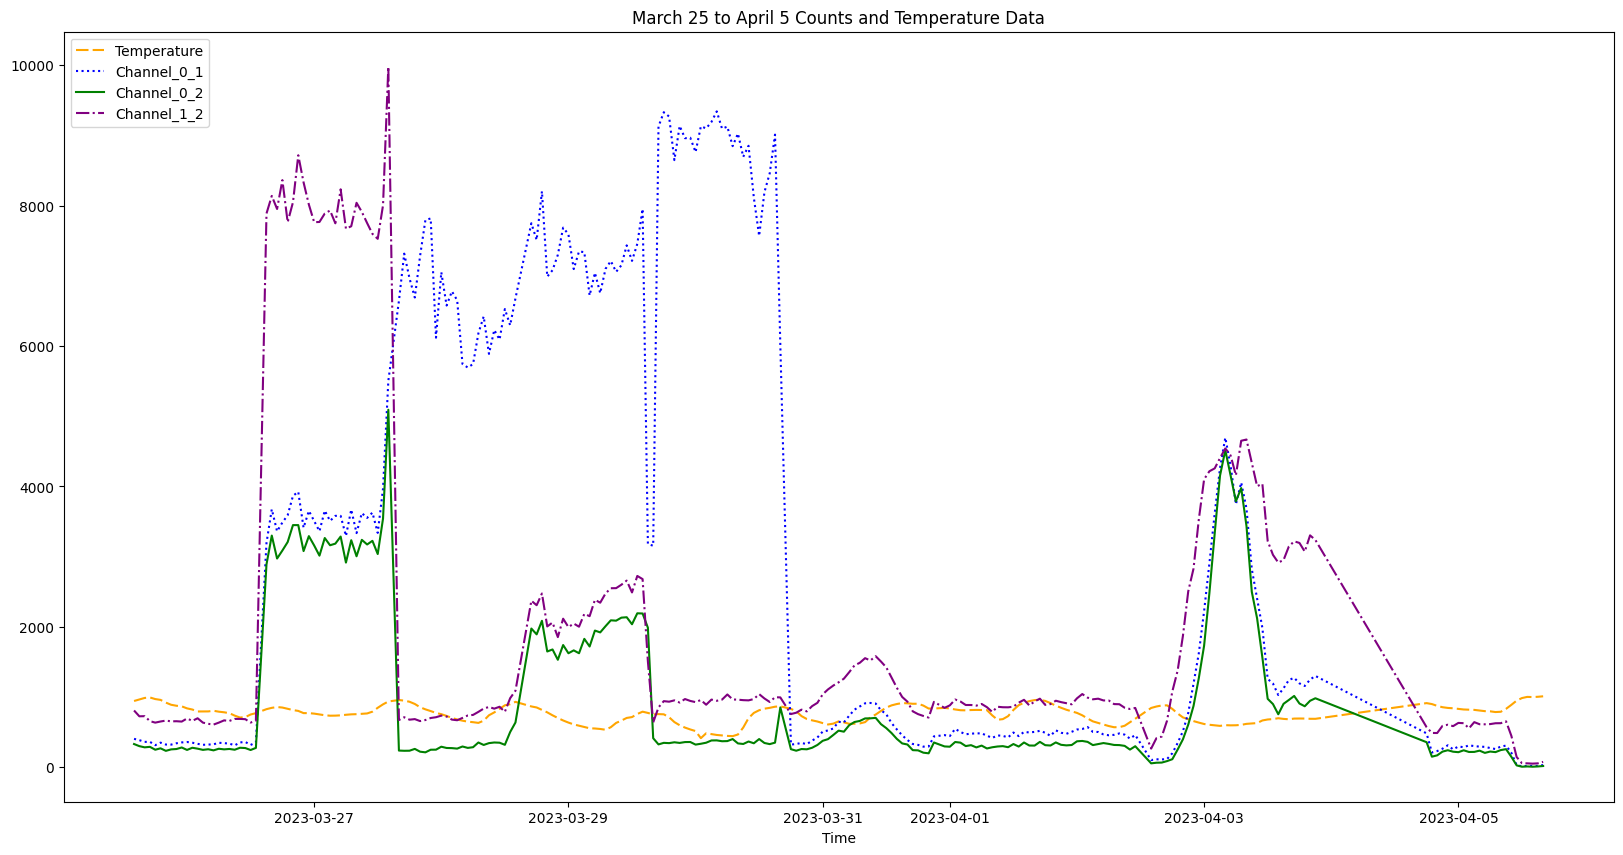

In [92]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='orange')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


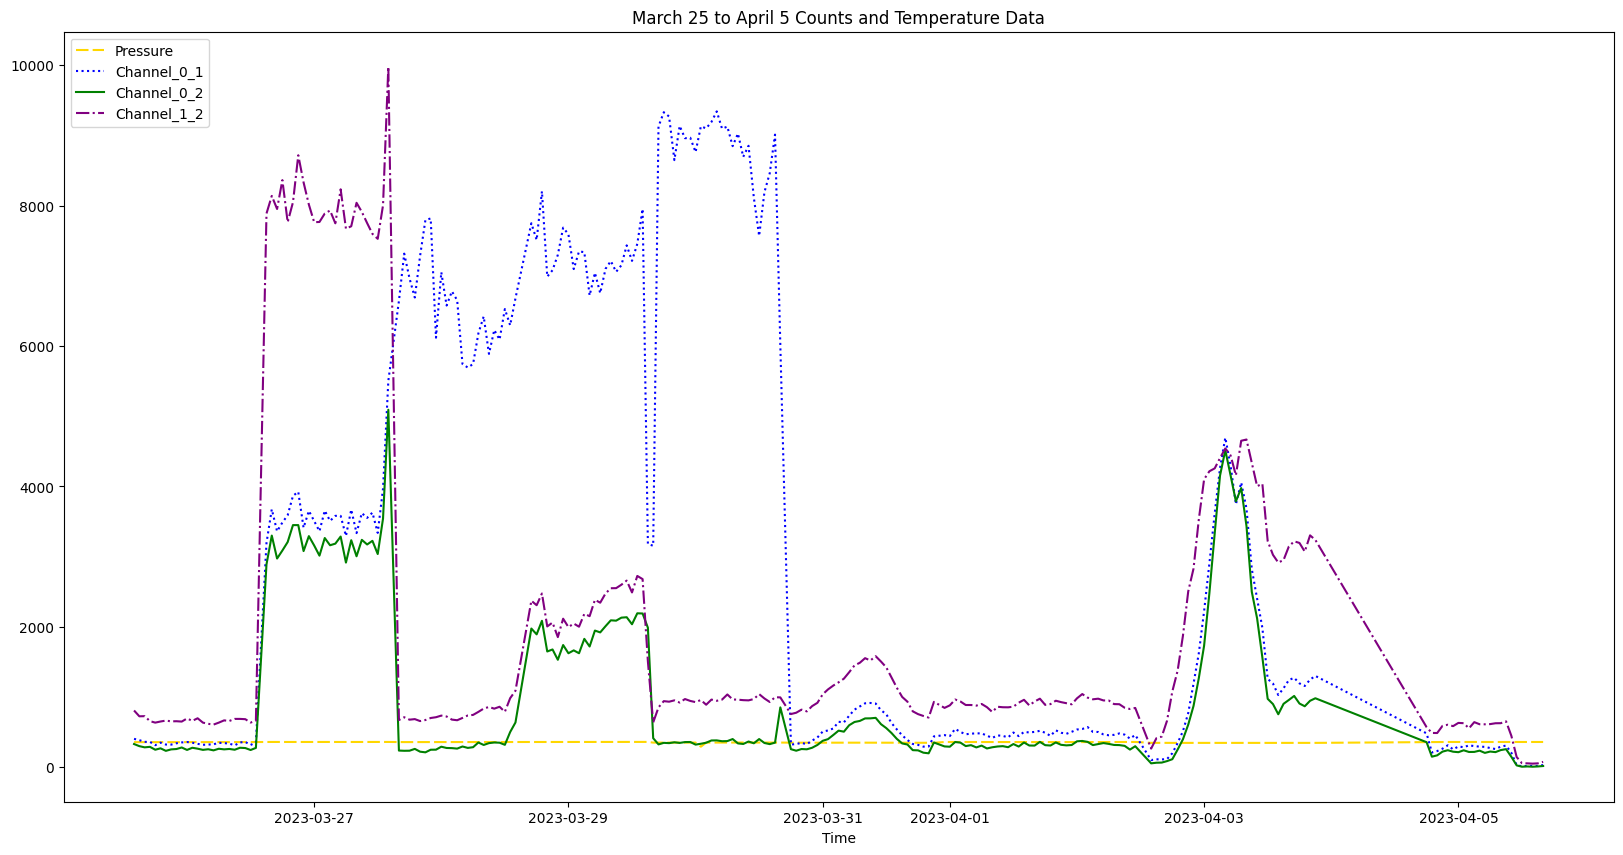

In [93]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend(['Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


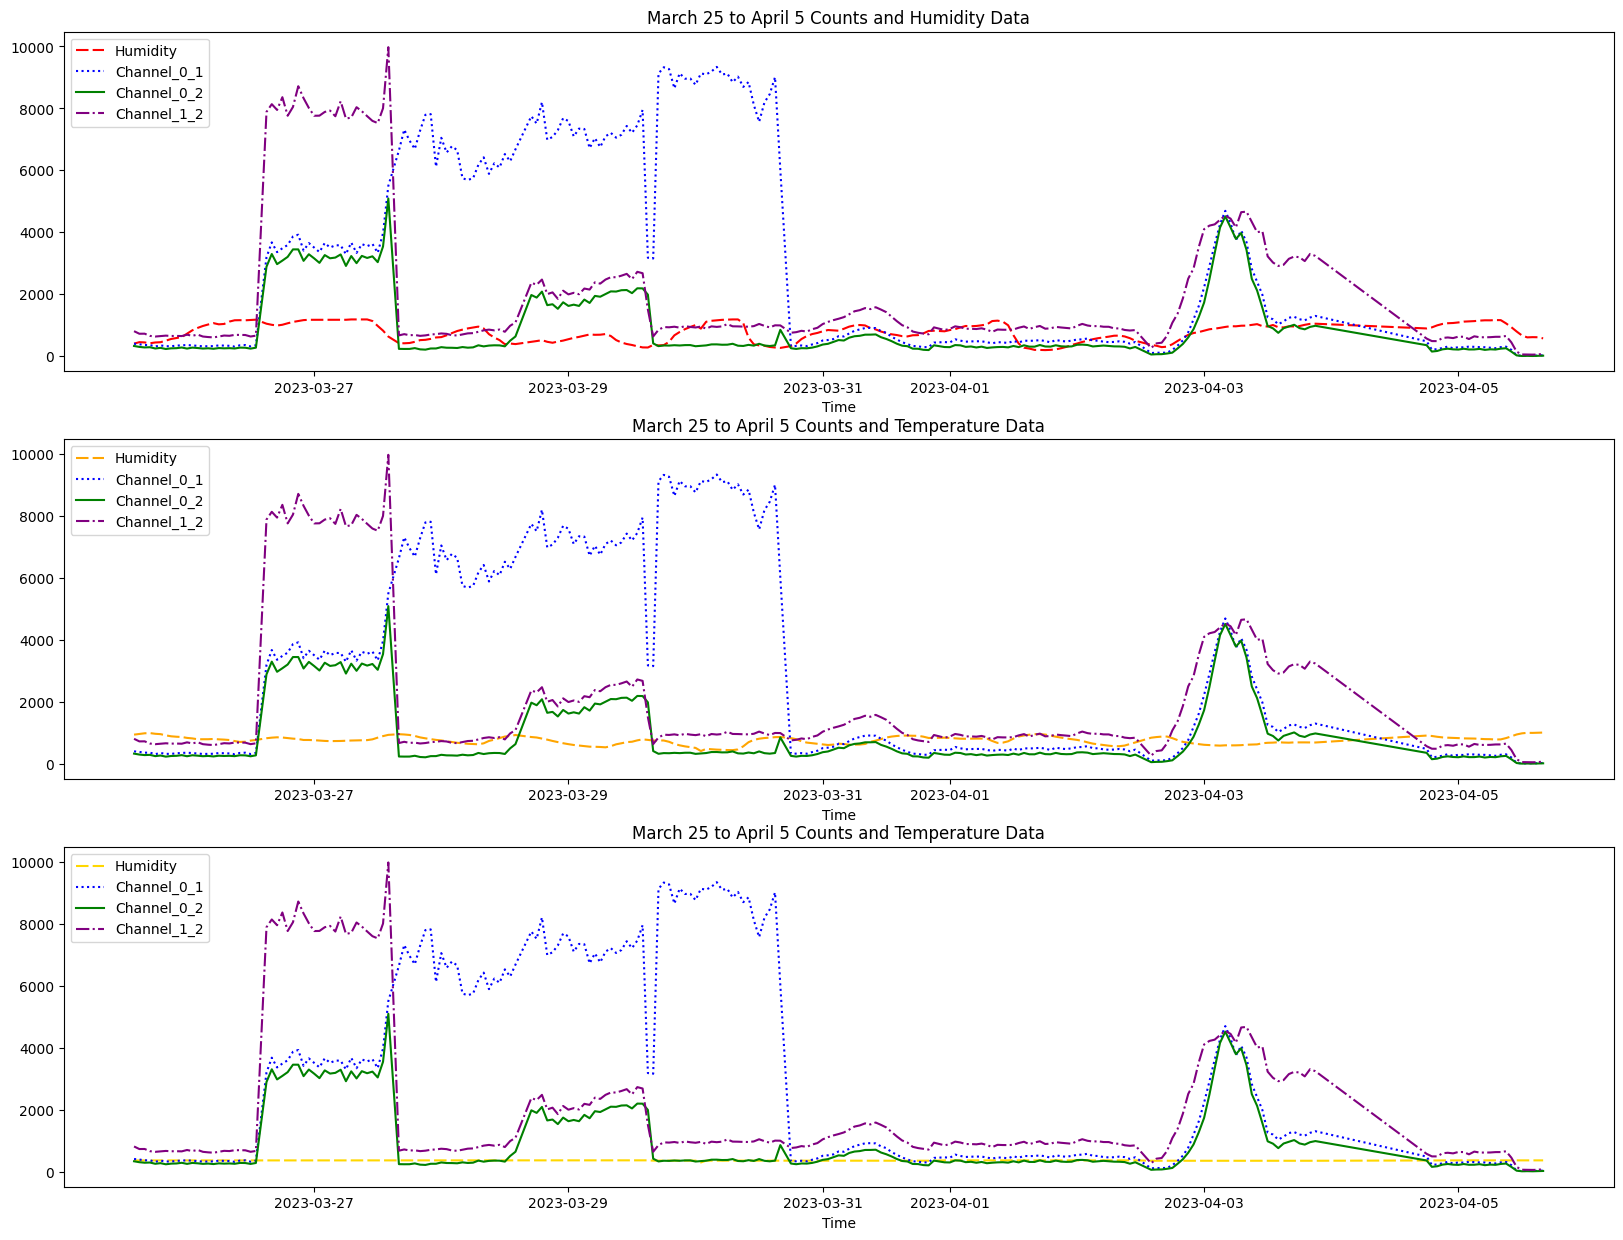

In [94]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='green')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='orange')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Humidity Data')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax2.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax2.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='orange')
ax2.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax2.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax3.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax3.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax3.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax3.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [95]:
#make zero mean and unit variance
df_scaled = df_combined.copy()
df_scaled['Chan_0_1'] = (df_scaled['Chan_0_1'] - df_scaled['Chan_0_1'].mean()) / df_scaled['Chan_0_1'].std()
df_scaled['Chan_0_2'] = (df_scaled['Chan_0_2'] - df_scaled['Chan_0_2'].mean()) / df_scaled['Chan_0_2'].std()
df_scaled['Chan_1_2'] = (df_scaled['Chan_1_2'] - df_scaled['Chan_1_2'].mean()) / df_scaled['Chan_1_2'].std()
df_scaled['Humidity (%)'] = (df_scaled['Humidity (%)'] - df_scaled['Humidity (%)'].mean()) / df_scaled['Humidity (%)'].std()
df_scaled['Outdoor Temperature (°F)'] = (df_scaled['Outdoor Temperature (°F)'] - df_scaled['Outdoor Temperature (°F)'].mean()) / df_scaled['Outdoor Temperature (°F)'].std()
df_scaled['Relative Pressure (inHg)'] = (df_scaled['Relative Pressure (inHg)'] - df_scaled['Relative Pressure (inHg)'].mean()) / df_scaled['Relative Pressure (inHg)'].std()
df_scaled.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Solar Radiation (W/m^2),Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-25 14:00:00,-0.822481,-0.540955,-0.524413,1.474062,18.1,26.8,123.6,3088,0.0,1.92,...,1586.1,346.40,23.028391,29.432997,26.239347,-3.248043,3.429087,-2.628736,1.168090,-0.268218
2023-03-25 15:00:00,-0.828474,-0.567886,-0.561292,1.644197,20.0,26.6,123.6,2900,0.0,1.92,...,2442.1,346.18,17.256689,17.701910,13.287721,3.586868,8.186695,2.676749,1.423631,-0.418850
2023-03-25 16:00:00,-0.836045,-0.583146,-0.560403,1.816695,17.2,27.9,123.6,2962,0.0,1.92,...,1894.0,346.04,9.966118,11.054294,13.599808,5.181680,8.903595,5.407514,1.682721,-0.491376
2023-03-25 17:00:00,-0.836045,-0.576862,-0.591950,1.868681,23.5,32.4,123.6,3160,0.0,1.92,...,1262.0,345.91,9.966118,13.791548,2.520706,6.138568,9.881185,4.830152,1.760803,-0.552745
2023-03-25 18:00:00,-0.850870,-0.613667,-0.601281,1.691457,14.3,21.2,123.6,3070,0.0,1.92,...,374.8,346.02,-4.311251,-2.240938,-0.756212,4.396931,7.860831,3.899092,1.494615,-0.502534


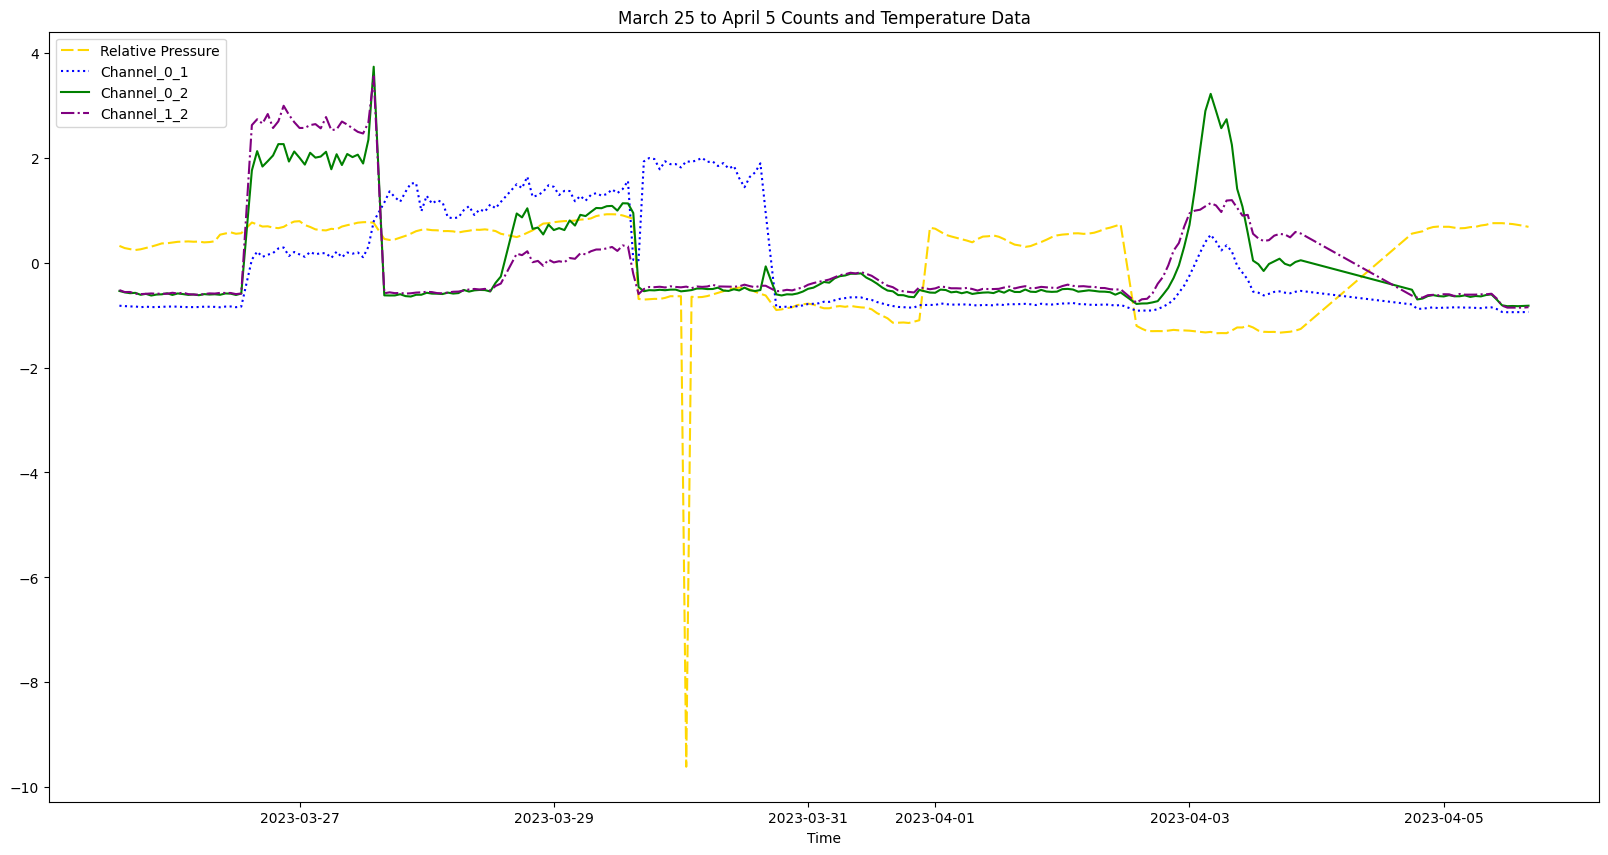

In [96]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='green')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

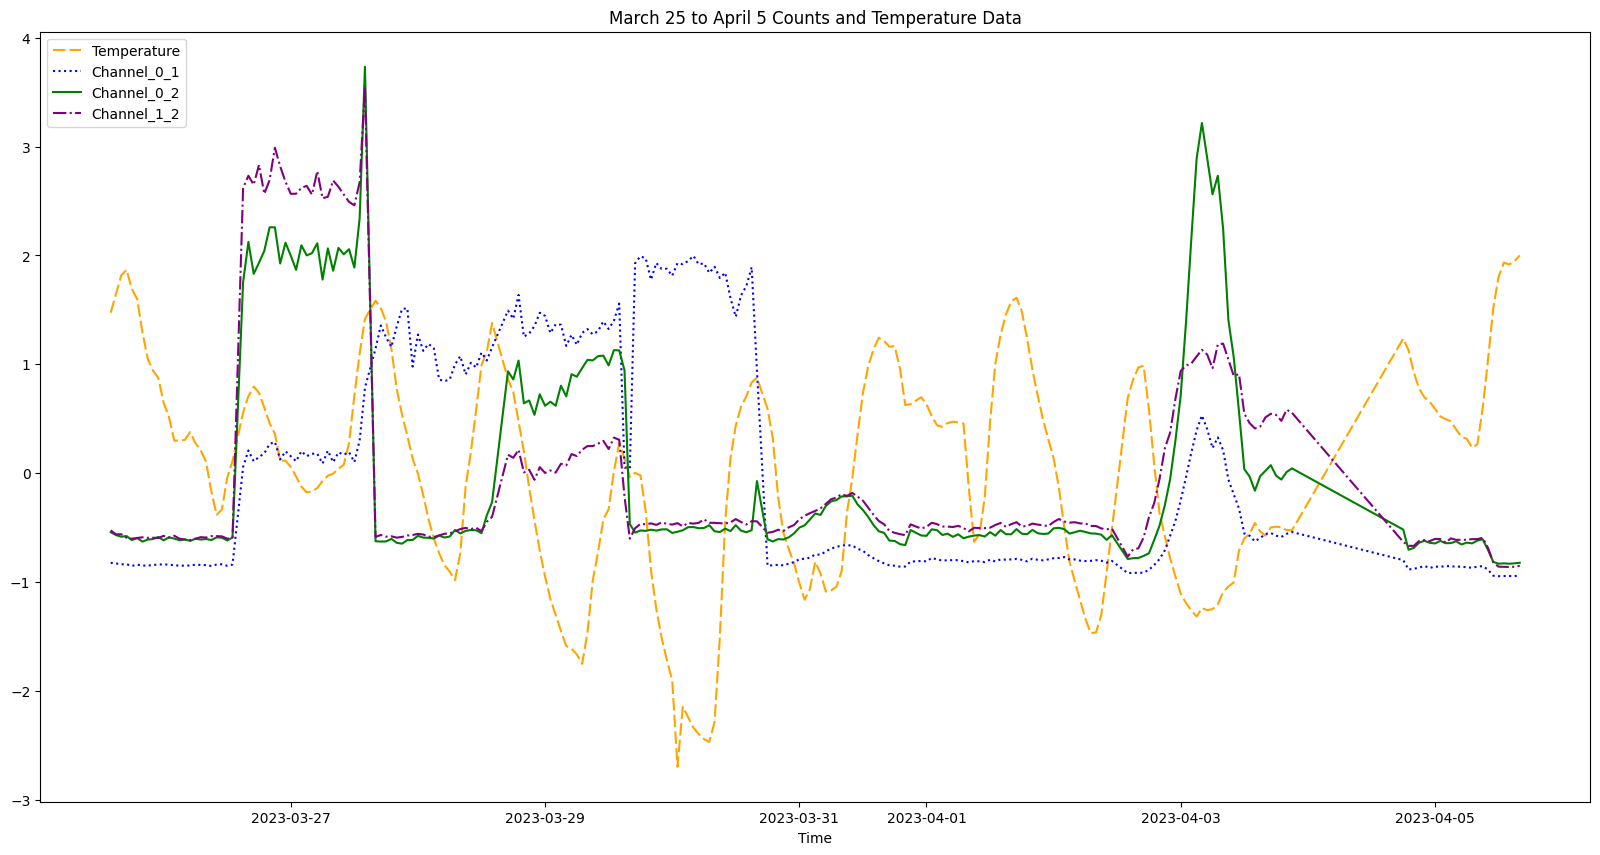

In [97]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_scaled.index, df_scaled['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_scaled.index, df_scaled['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='green')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

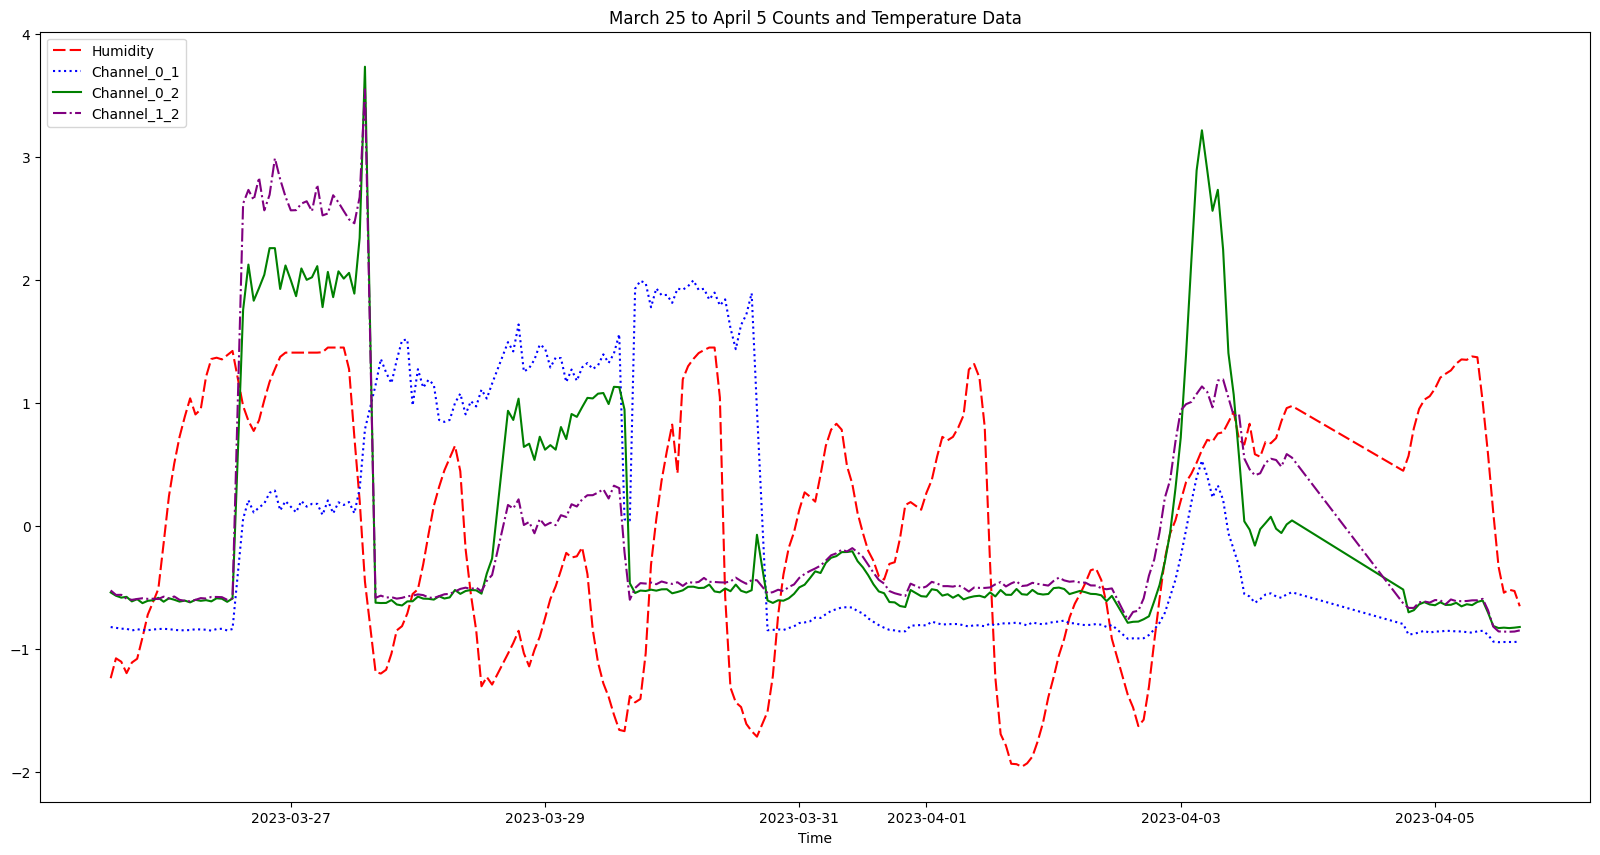

In [98]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_scaled.index, df_scaled['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_scaled.index, df_scaled['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='green')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

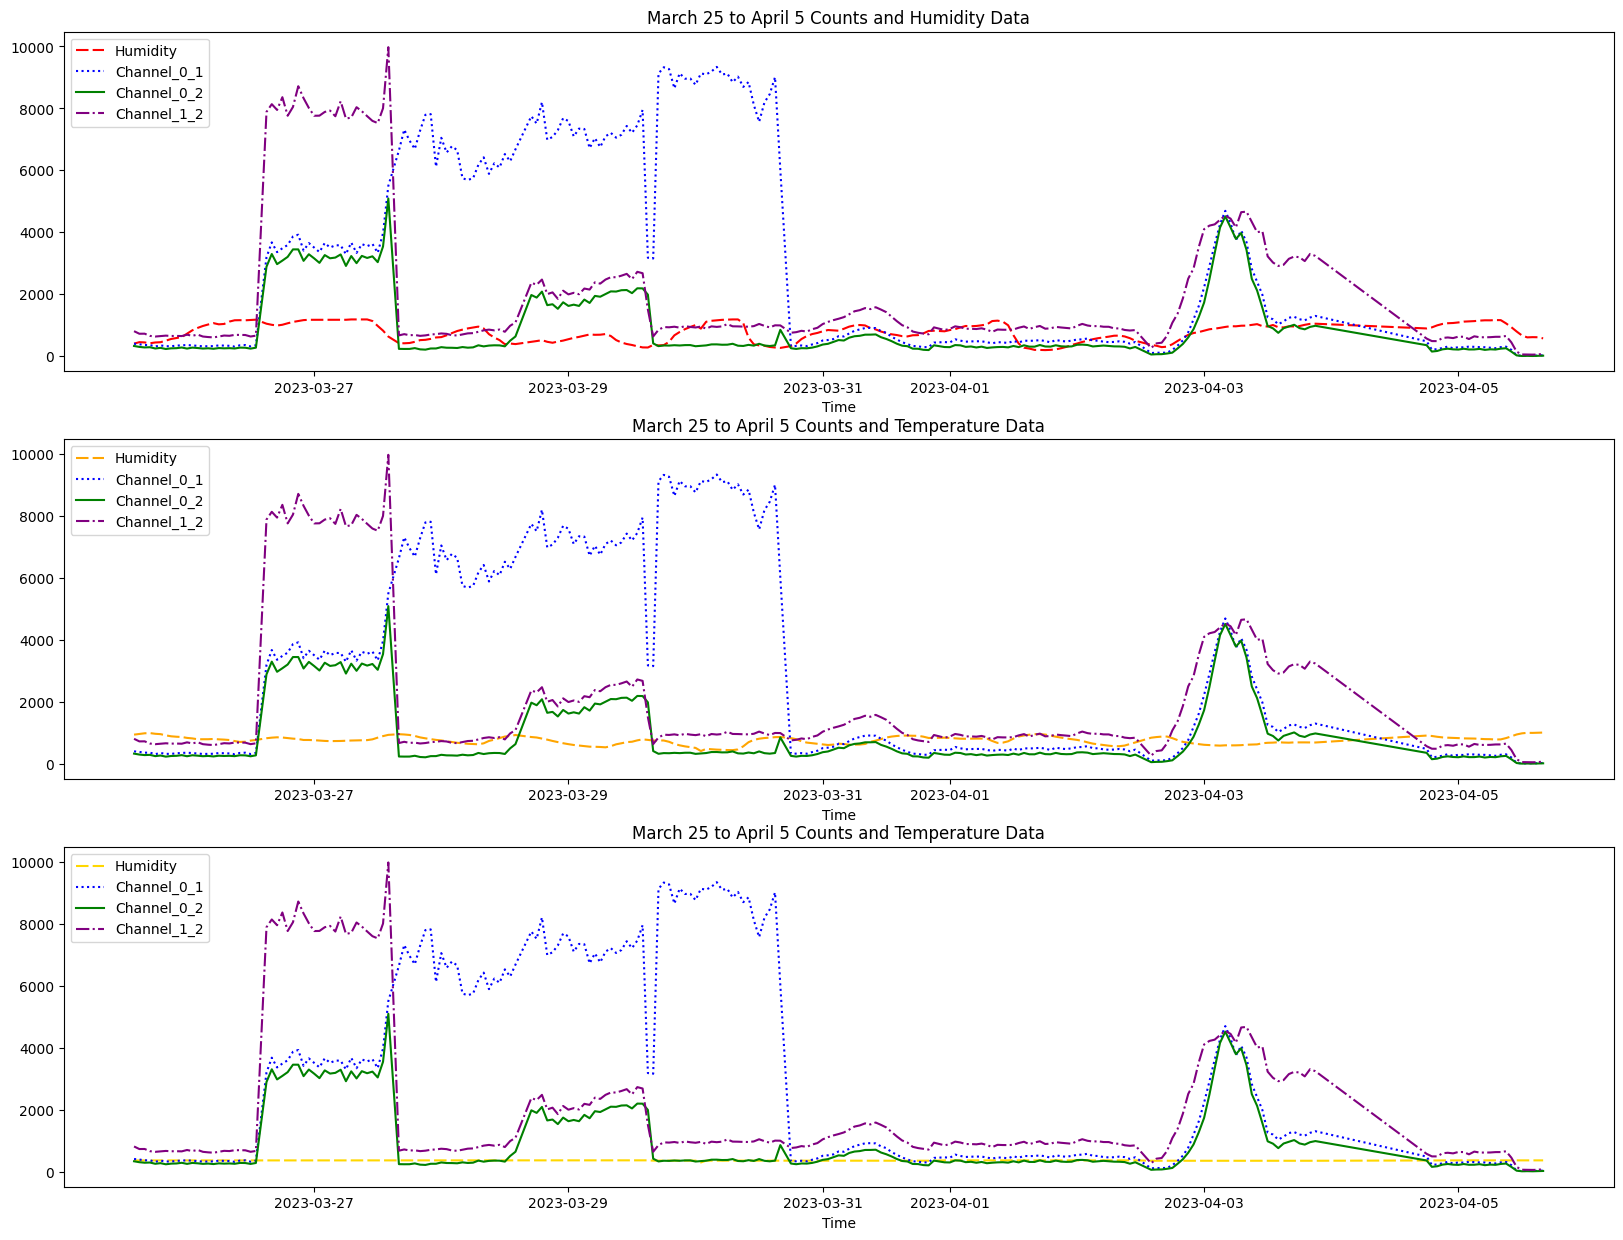

In [99]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='green')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='orange')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('March 25 to April 5 Counts and Humidity Data')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax2.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax2.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='orange')
ax2.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax2.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax3.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax3.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_combined.index, df_combined['Chan_0_2'], color='green')
ax3.plot(df_combined.index, df_combined['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax3.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [100]:
df_combined['average'] = df_combined[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_combined.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor Temperature (°F),Wind Speed (mph),Wind Gust (mph),Max Daily Gust (mph),Wind Direction (°),Hourly Rain (in/hr),Event Rain (in),...,Absolute Pressure (inHg),Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg,Temperature_F_pct,Relative_Pressure_pct,average
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-25 14:00:00,405.0,331.0,809.0,944.0,18.1,26.8,123.6,3088,0.0,1.92,...,346.40,23.028391,29.432997,26.239347,-3.248043,3.429087,-2.628736,1.168090,-0.268218,515.000000
2023-03-25 15:00:00,386.0,301.0,726.0,965.6,20.0,26.6,123.6,2900,0.0,1.92,...,346.18,17.256689,17.701910,13.287721,3.586868,8.186695,2.676749,1.423631,-0.418850,471.000000
2023-03-25 16:00:00,362.0,284.0,728.0,987.5,17.2,27.9,123.6,2962,0.0,1.92,...,346.04,9.966118,11.054294,13.599808,5.181680,8.903595,5.407514,1.682721,-0.491376,458.000000
2023-03-25 17:00:00,362.0,291.0,657.0,994.1,23.5,32.4,123.6,3160,0.0,1.92,...,345.91,9.966118,13.791548,2.520706,6.138568,9.881185,4.830152,1.760803,-0.552745,436.666667
2023-03-25 18:00:00,315.0,250.0,636.0,971.6,14.3,21.2,123.6,3070,0.0,1.92,...,346.02,-4.311251,-2.240938,-0.756212,4.396931,7.860831,3.899092,1.494615,-0.502534,400.333333


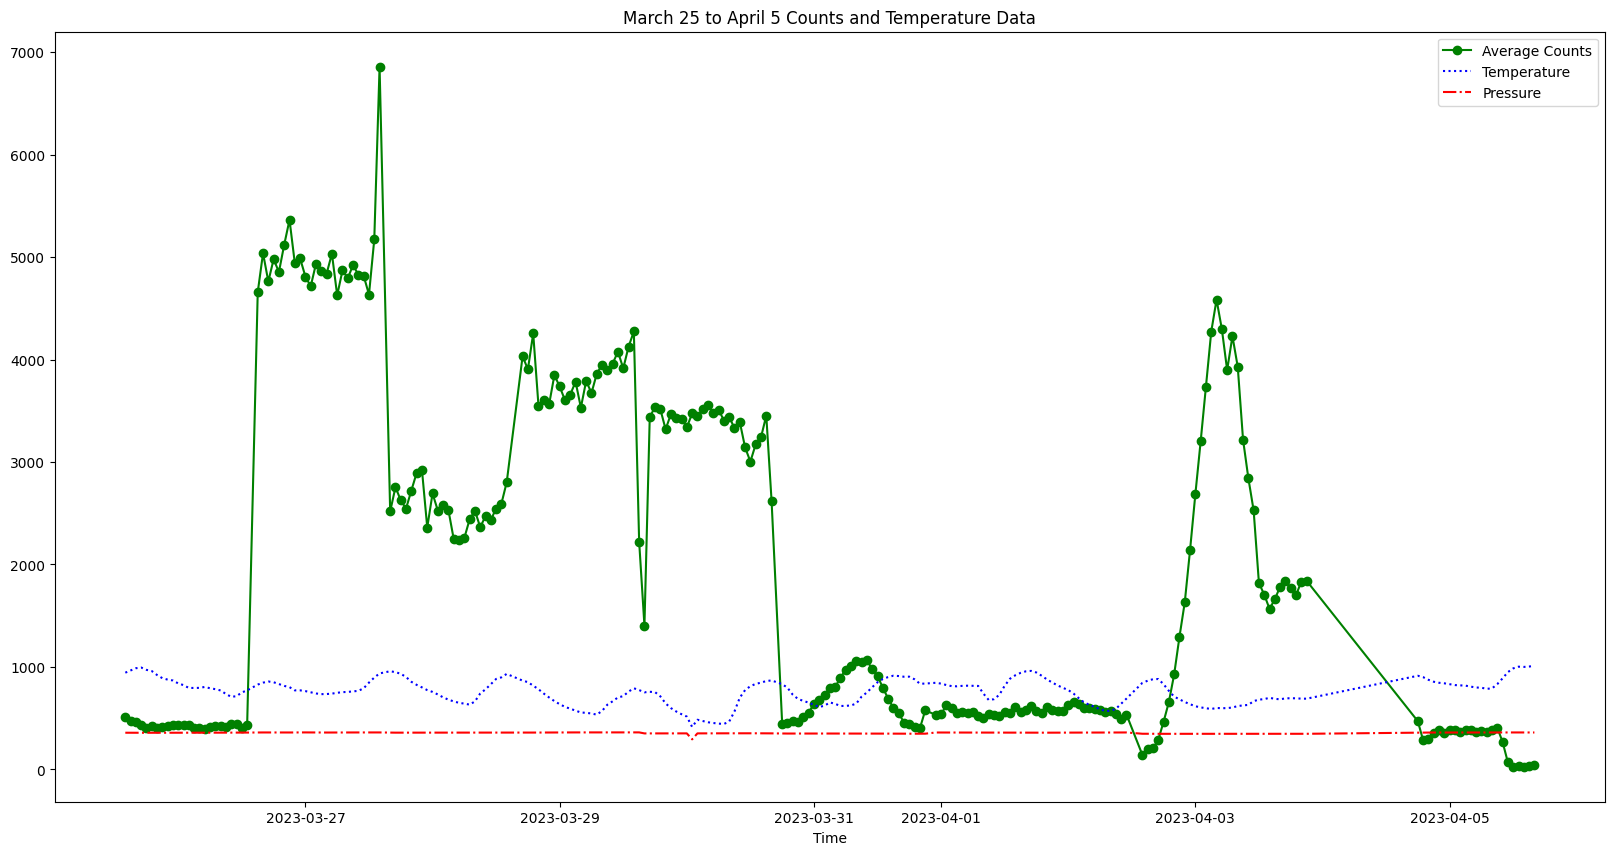

In [101]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
ax1.plot(df_combined.index, df_combined['average'], color='green', label='Average Counts', marker='o')
ax1.set_xlabel('Time')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'], color='blue', linestyle='dotted', label='Temperature')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'], color='red', linestyle='dashdot', label='Pressure')
#set the title
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend()

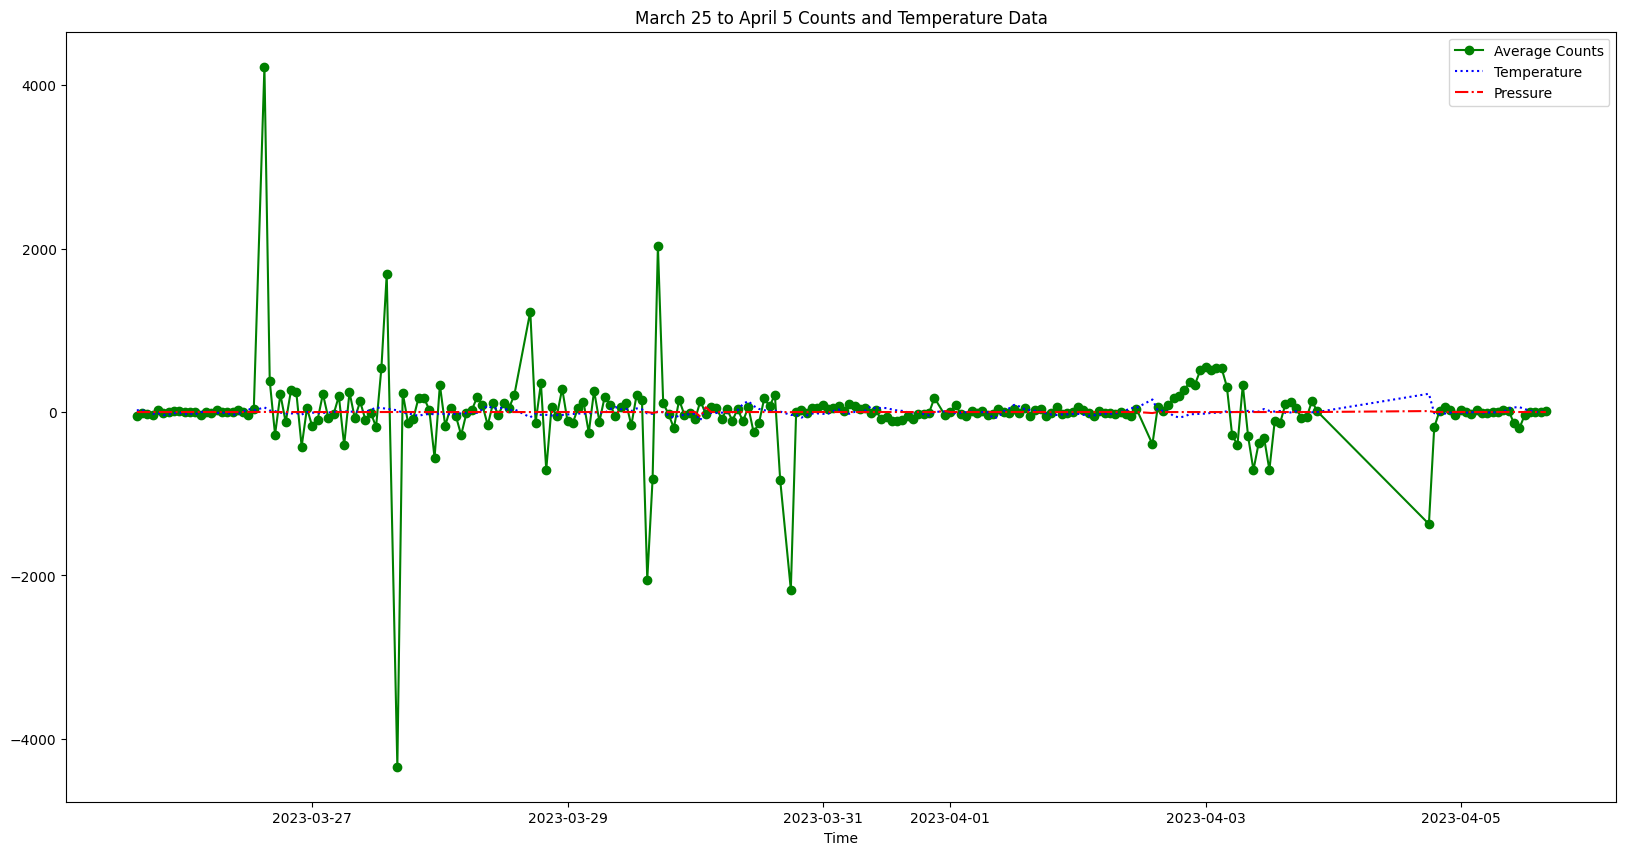

In [102]:
#plot first order differential 
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
ax1.plot(df_combined.index, df_combined['average'].diff(), color='green', label='Average Counts', marker='o')
ax1.set_xlabel('Time')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor Temperature (°F)'].diff(), color='blue', linestyle='dotted', label='Temperature')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative Pressure (inHg)'].diff(), color='red', linestyle='dashdot', label='Pressure')
#set the title  
ax1.set_title('March 25 to April 5 Counts and Temperature Data')
#set the legend
ax1.legend()